In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold, cross_val_score
import statsmodels.formula.api as smf


In [2]:
# load the dataset
rs_data = pd.read_csv("Real estate.csv")
# display the first few rows of the dataset
print(rs_data.to_string())

      No  X1 transaction date  X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  X5 latitude  X6 longitude  Y house price of unit area
0      1             2012.917          32.0                                84.87882                               10     24.98298     121.54024                        37.9
1      2             2012.917          19.5                               306.59470                                9     24.98034     121.53951                        42.2
2      3             2013.583          13.3                               561.98450                                5     24.98746     121.54391                        47.3
3      4             2013.500          13.3                               561.98450                                5     24.98746     121.54391                        54.8
4      5             2012.833           5.0                               390.56840                                5     24.97937     121.54

In [3]:
# data info
rs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
rs_data.shape

(414, 8)

In [5]:
rs_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
#check for unique values 
rs_data.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

data_clean

In [7]:
#cheking for null values
rs_data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
#checking for duplicates
rs_data.duplicated().sum()

np.int64(0)

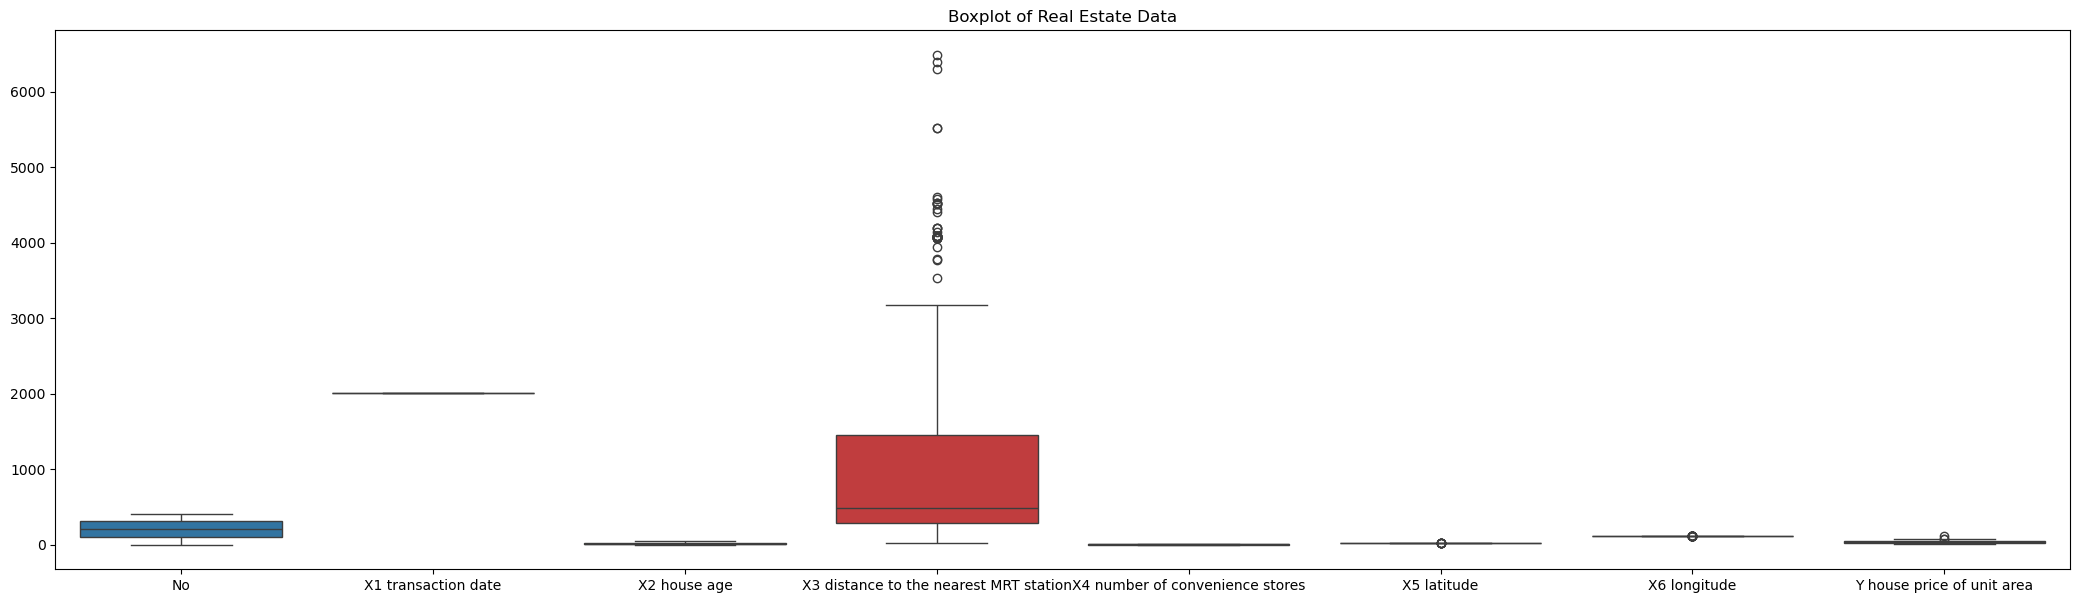

In [10]:
#chek for outliesrs
sns.boxplot(data=rs_data)
plt.title("Boxplot of Real Estate Data")
plt.rcParams["figure.figsize"] = (26, 7)
plt.show()

In [11]:
Q1 = rs_data.quantile(0.25)
Q3 = rs_data.quantile(0.75)
IQr = Q3 - Q1

print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQr)

Q1:
 No                                         104.250000
X1 transaction date                       2012.917000
X2 house age                                 9.025000
X3 distance to the nearest MRT station     289.324800
X4 number of convenience stores              1.000000
X5 latitude                                 24.963000
X6 longitude                               121.528085
Y house price of unit area                  27.700000
Name: 0.25, dtype: float64

Q3:
 No                                         310.750000
X1 transaction date                       2013.417000
X2 house age                                28.150000
X3 distance to the nearest MRT station    1454.279000
X4 number of convenience stores              6.000000
X5 latitude                                 24.977455
X6 longitude                               121.543305
Y house price of unit area                  46.600000
Name: 0.75, dtype: float64

IQR:
 No                                         206.500000
X1 transac

In [12]:
lower_bound = Q1 - 1.5 * IQr
upper_bound = Q3 + 1.5 * IQr

print("Lower Bound:\n", lower_bound)
print("\nUpper Bound:\n", upper_bound)

Lower Bound:
 No                                        -205.500000
X1 transaction date                       2012.167000
X2 house age                               -19.662500
X3 distance to the nearest MRT station   -1458.106500
X4 number of convenience stores             -6.500000
X5 latitude                                 24.941318
X6 longitude                               121.505255
Y house price of unit area                  -0.650000
dtype: float64

Upper Bound:
 No                                         620.500000
X1 transaction date                       2014.167000
X2 house age                                56.837500
X3 distance to the nearest MRT station    3201.710300
X4 number of convenience stores             13.500000
X5 latitude                                 24.999137
X6 longitude                               121.566135
Y house price of unit area                  74.950000
dtype: float64


In [13]:
rs_data_cln = rs_data[((rs_data >= lower_bound) & (rs_data <= upper_bound)).all(axis=1)]
print("Shape of the cleaned dataset:", rs_data_cln.shape)

Shape of the cleaned dataset: (371, 8)


data visualization

In [14]:
rs_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [15]:
numeric_cols = rs_data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns in the dataset:\n", numeric_cols)

Numeric columns in the dataset:
 Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


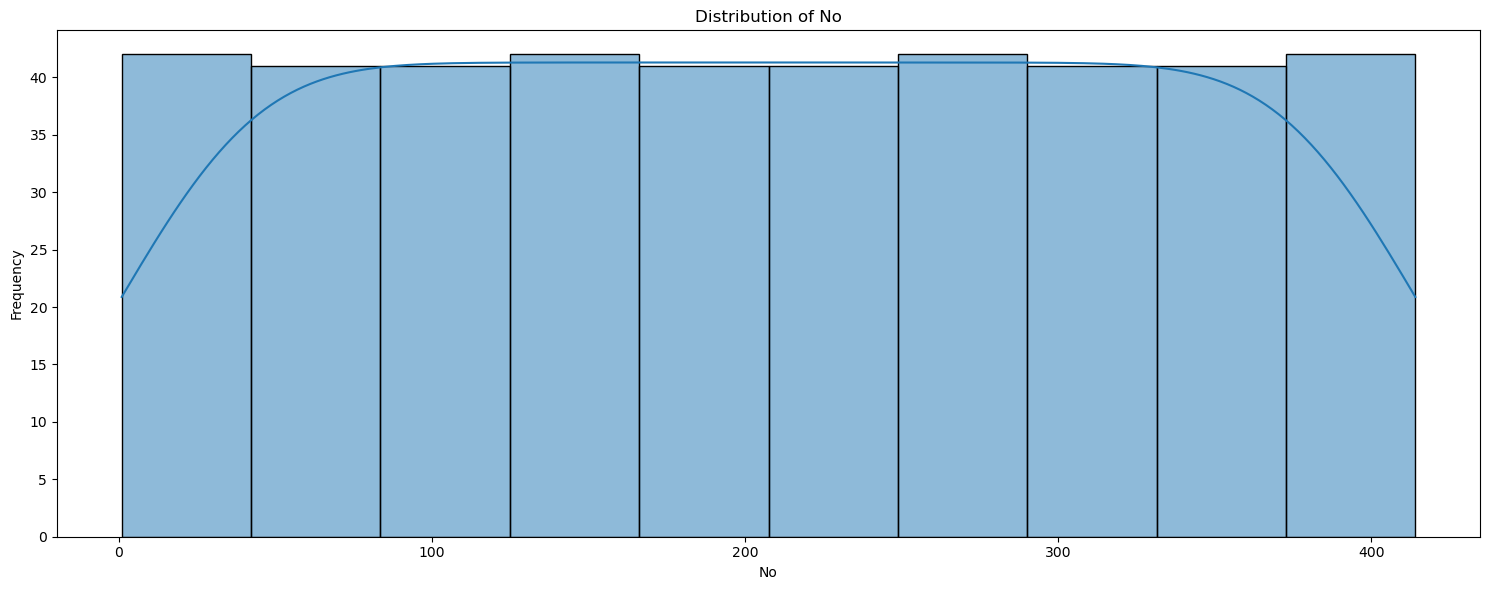

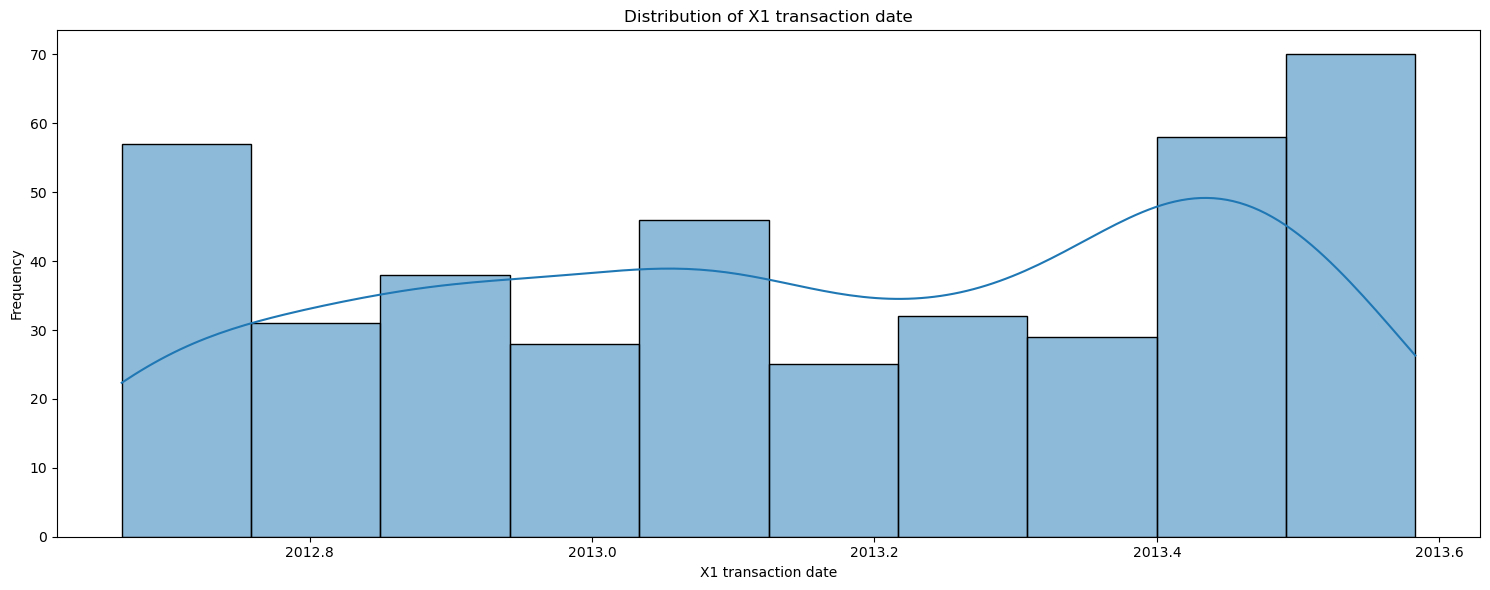

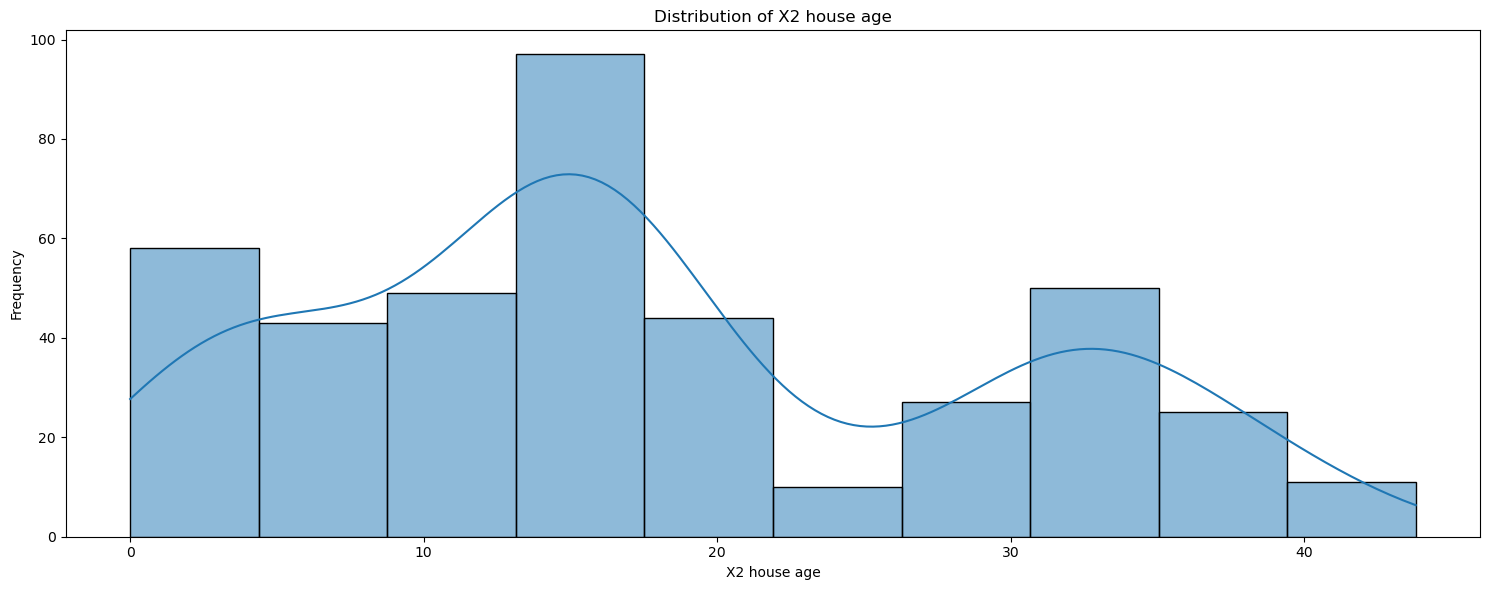

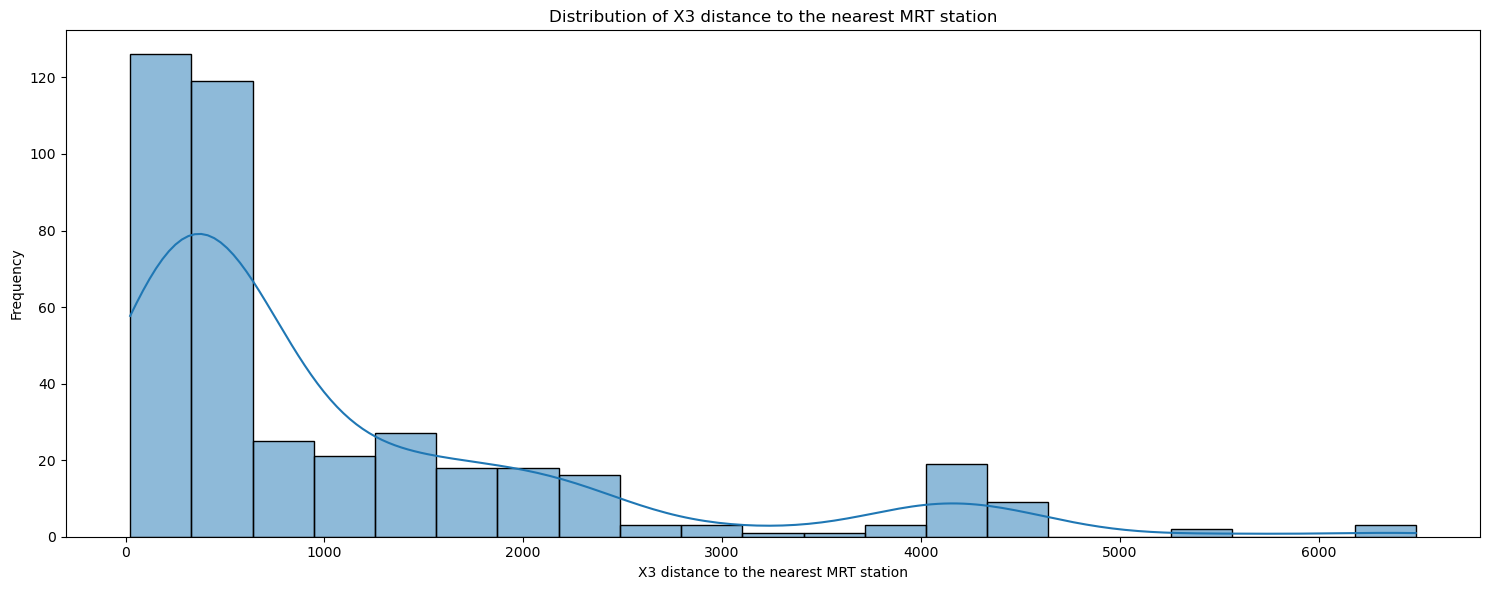

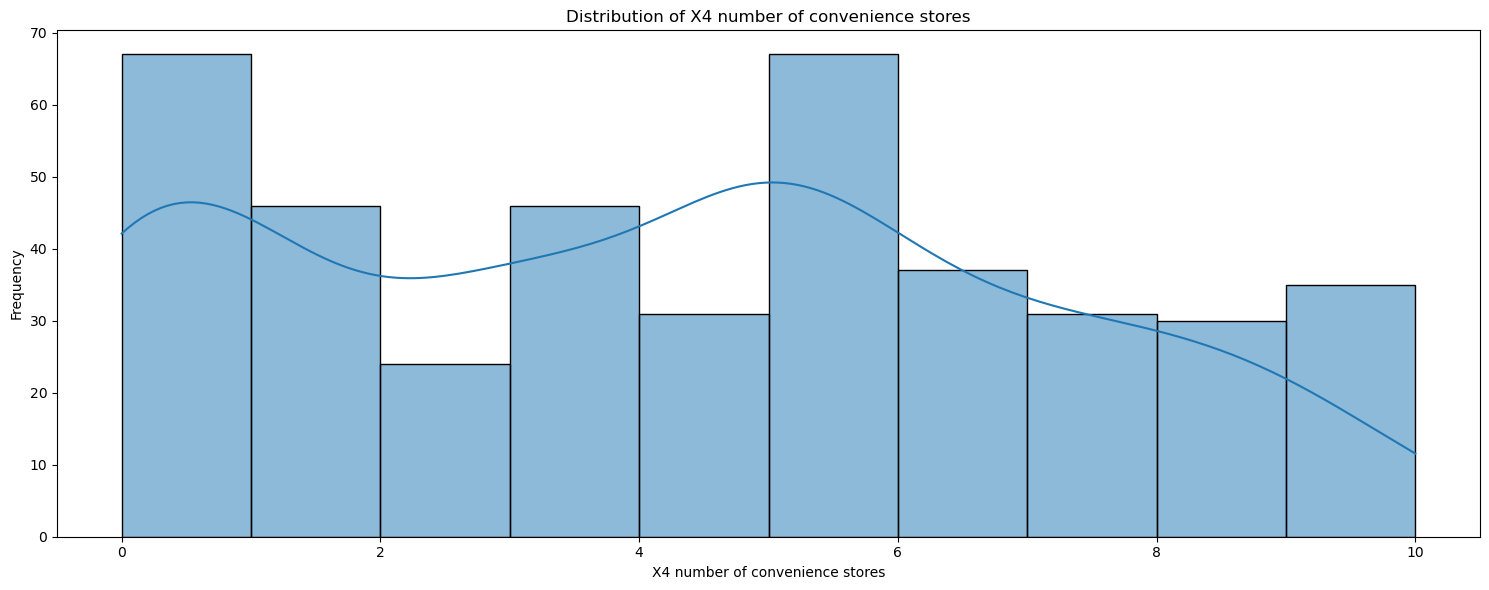

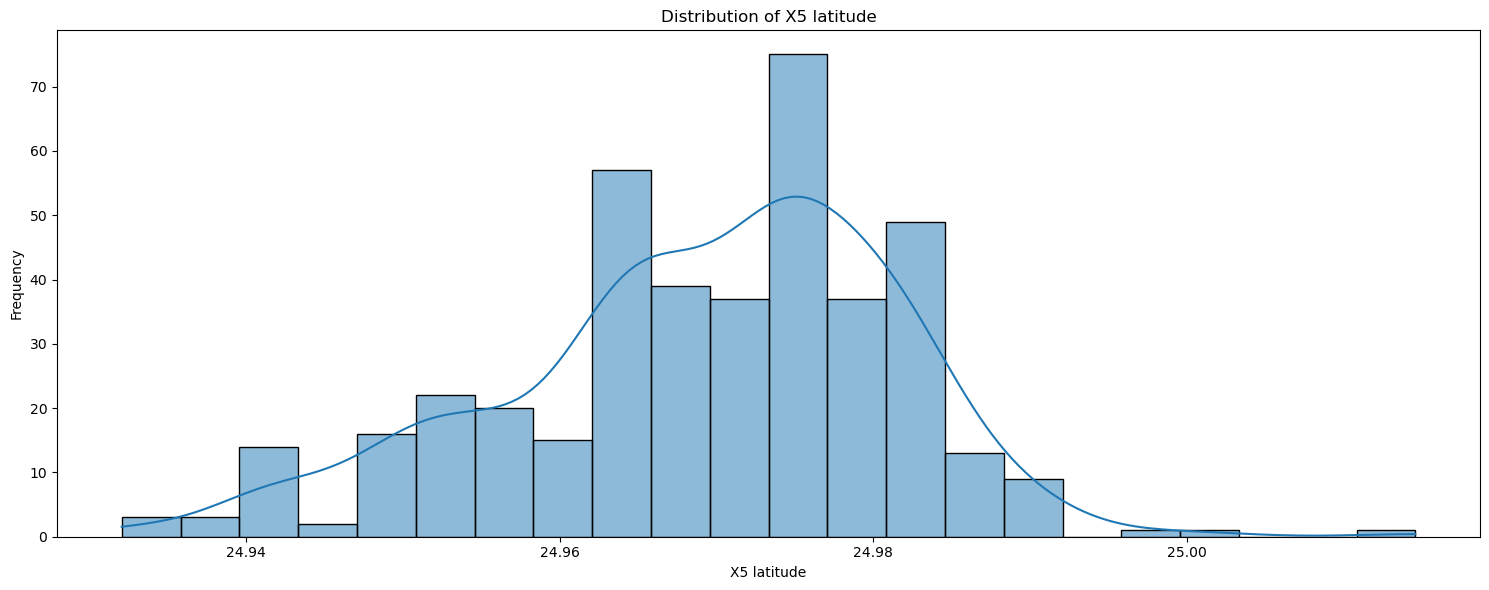

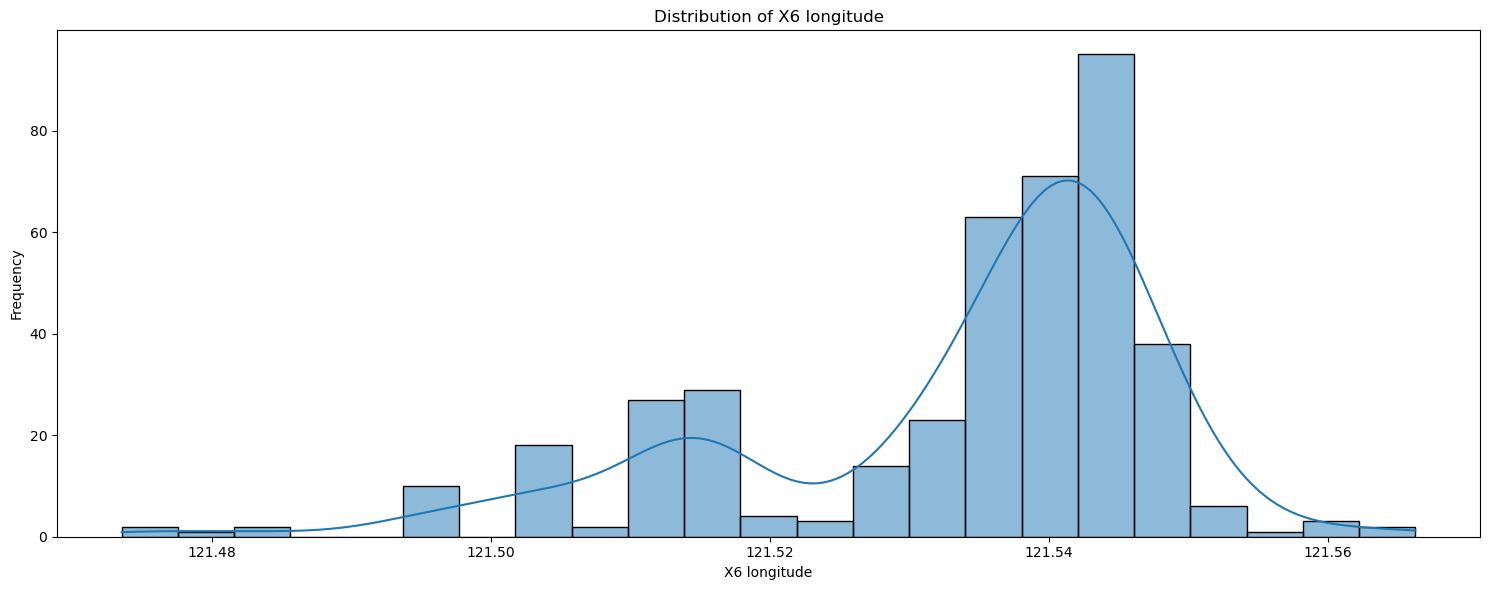

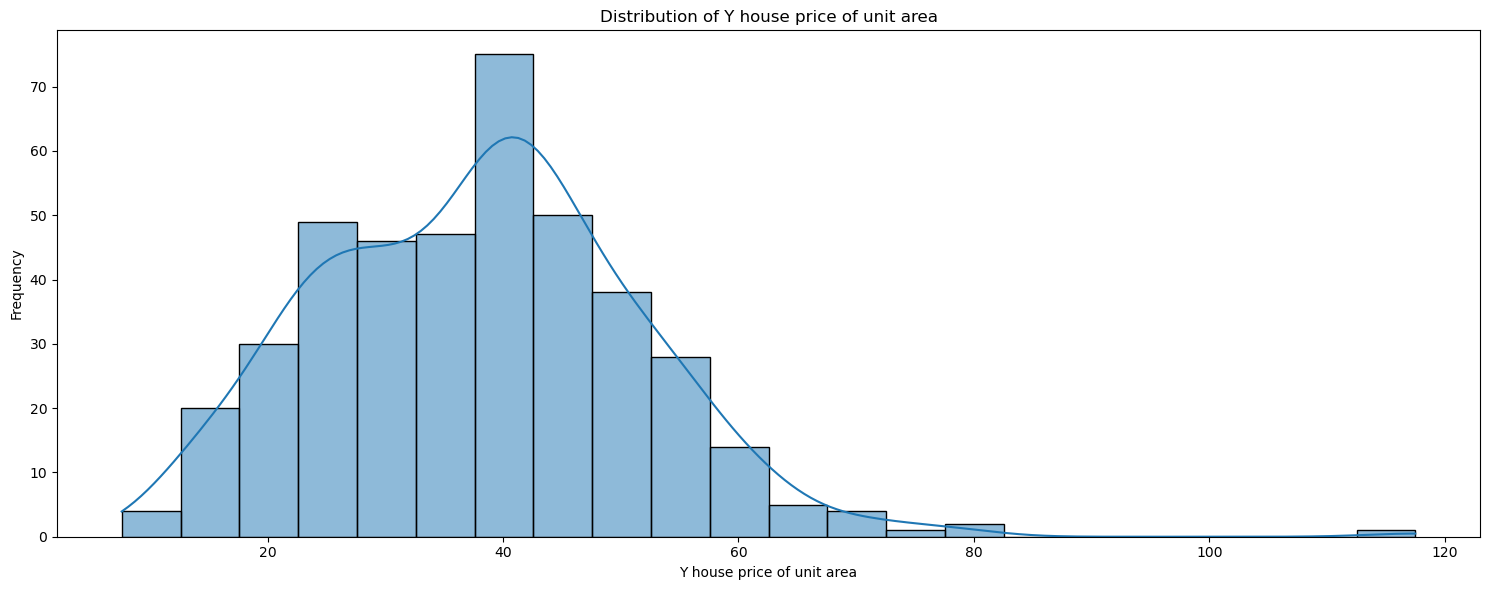

In [16]:
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, 6))
    sns.histplot(rs_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

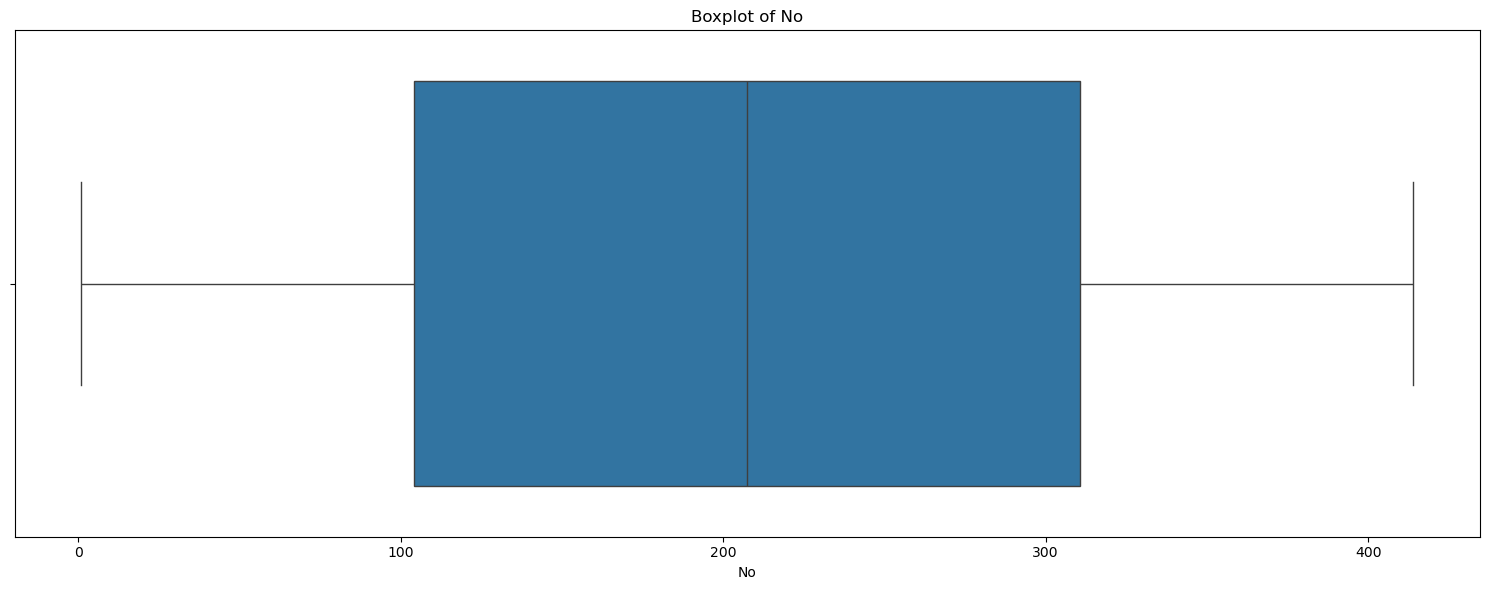

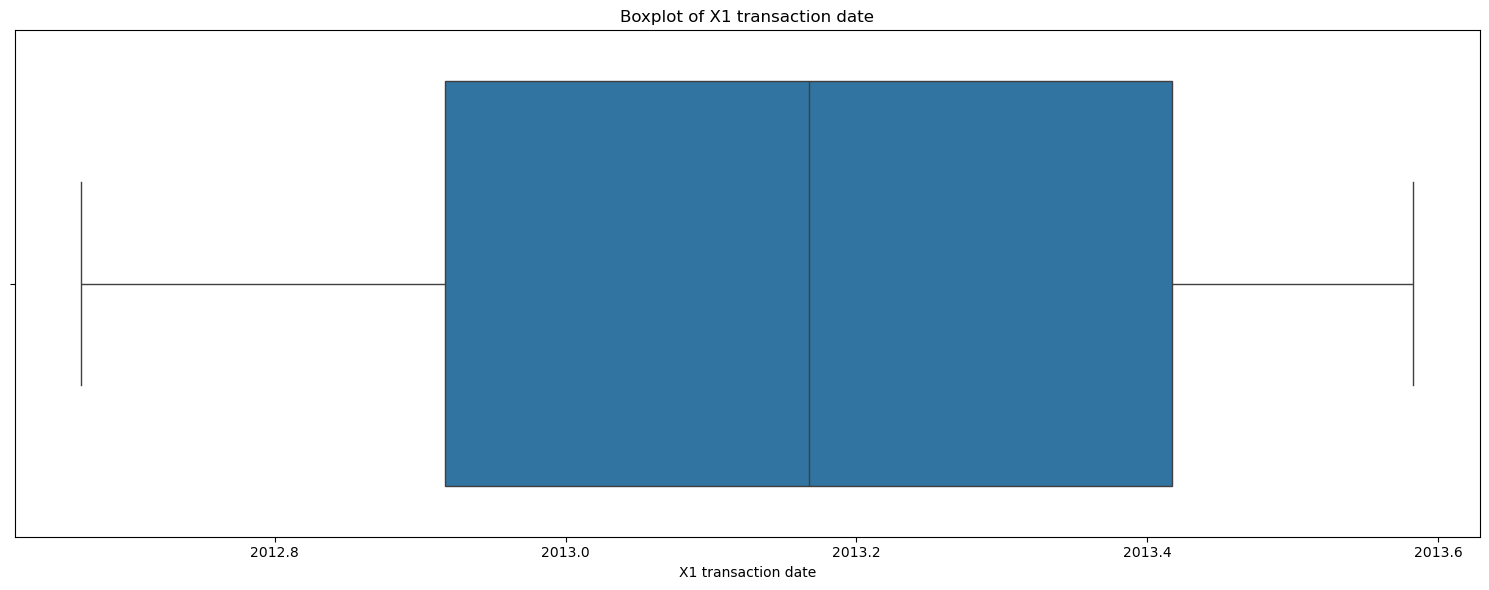

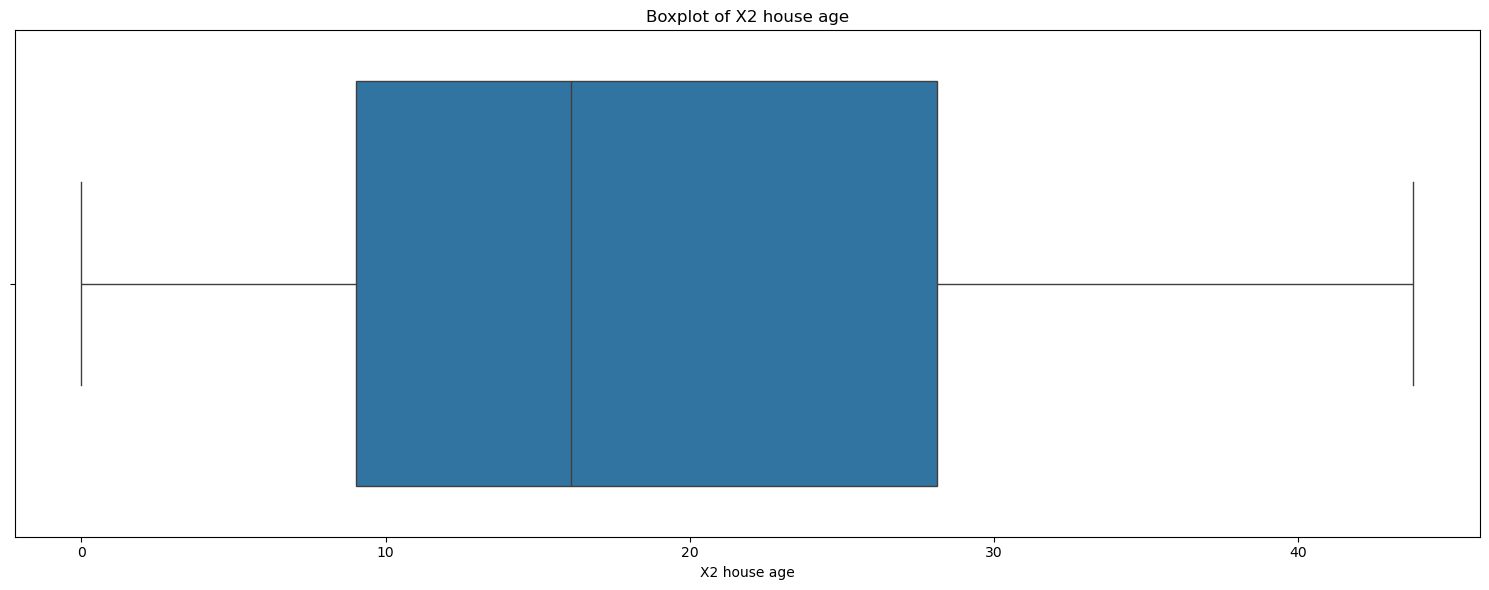

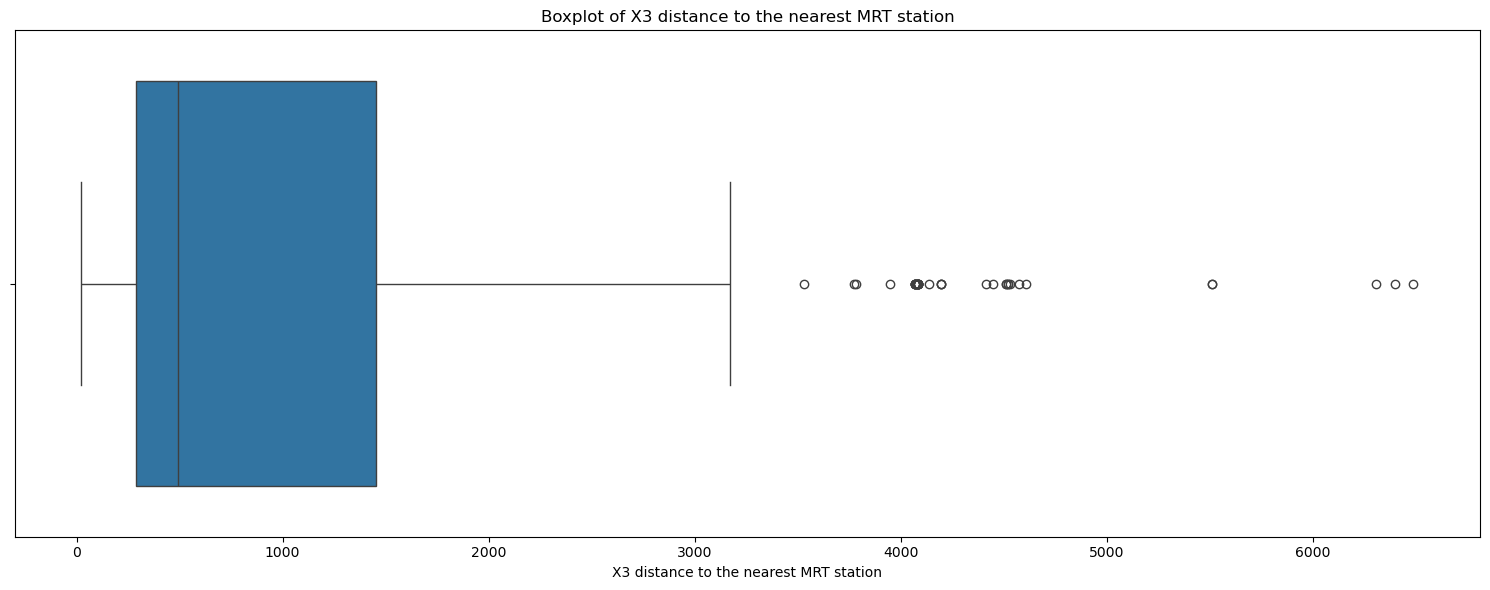

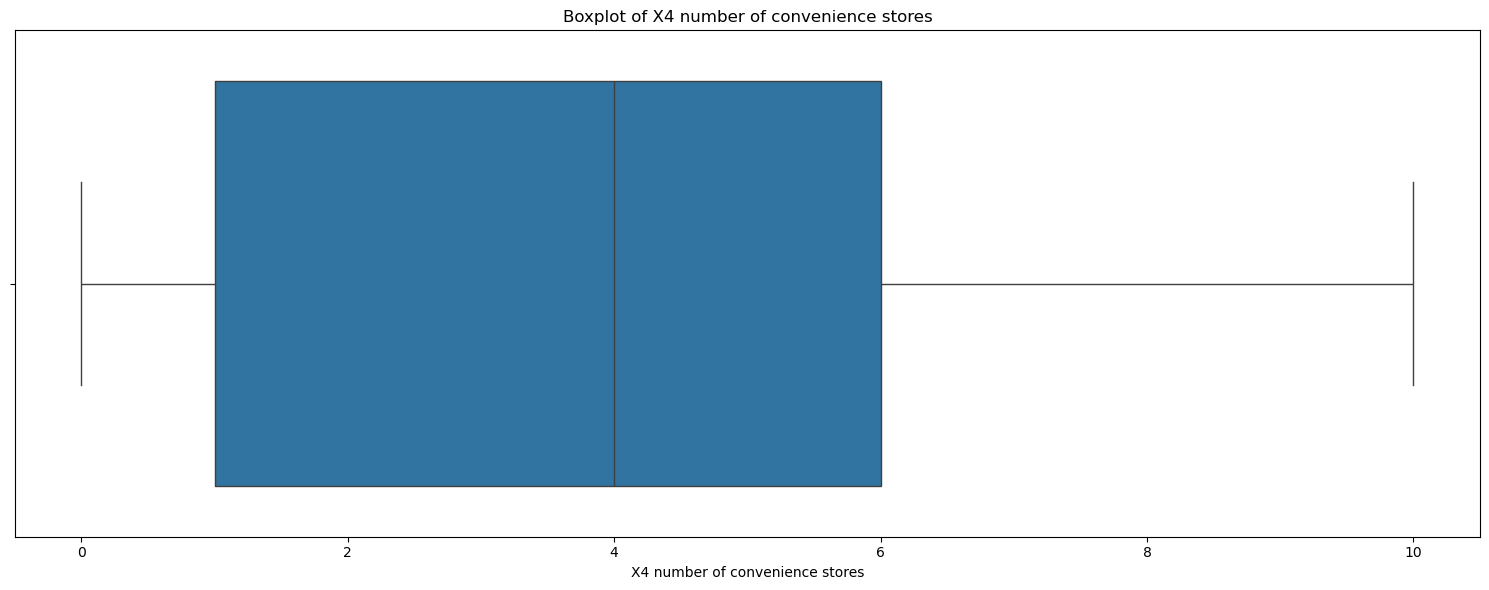

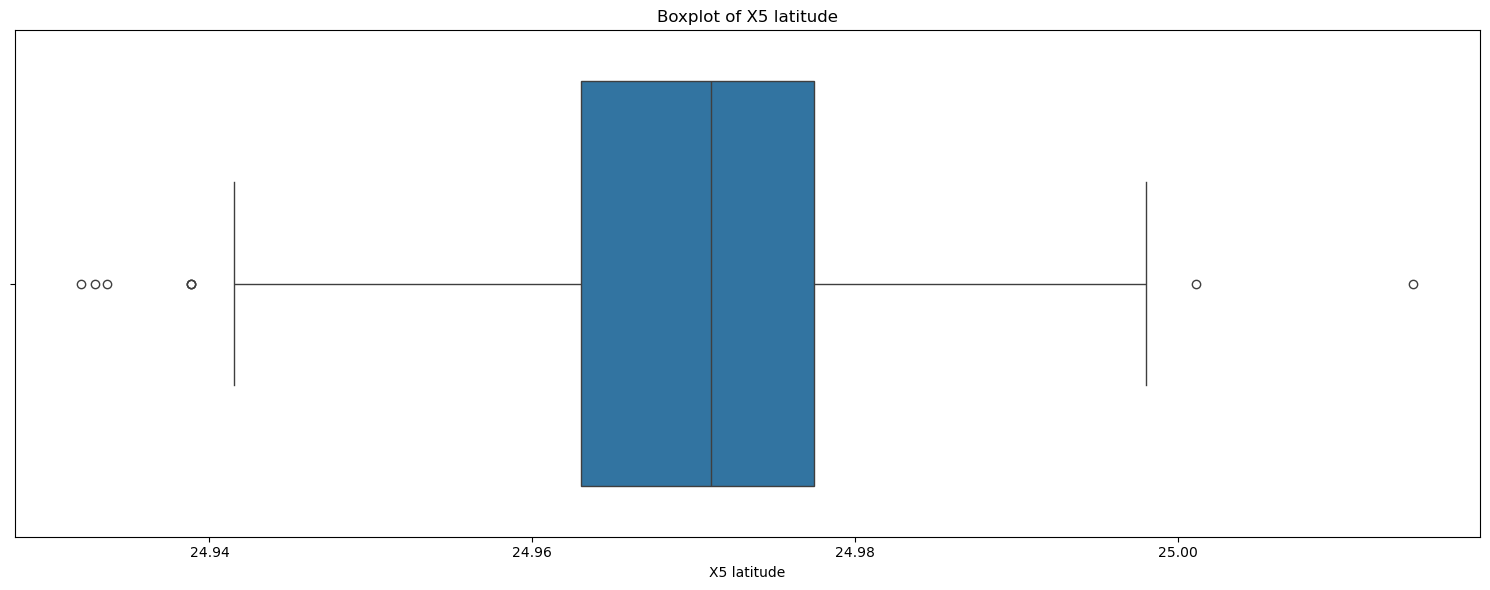

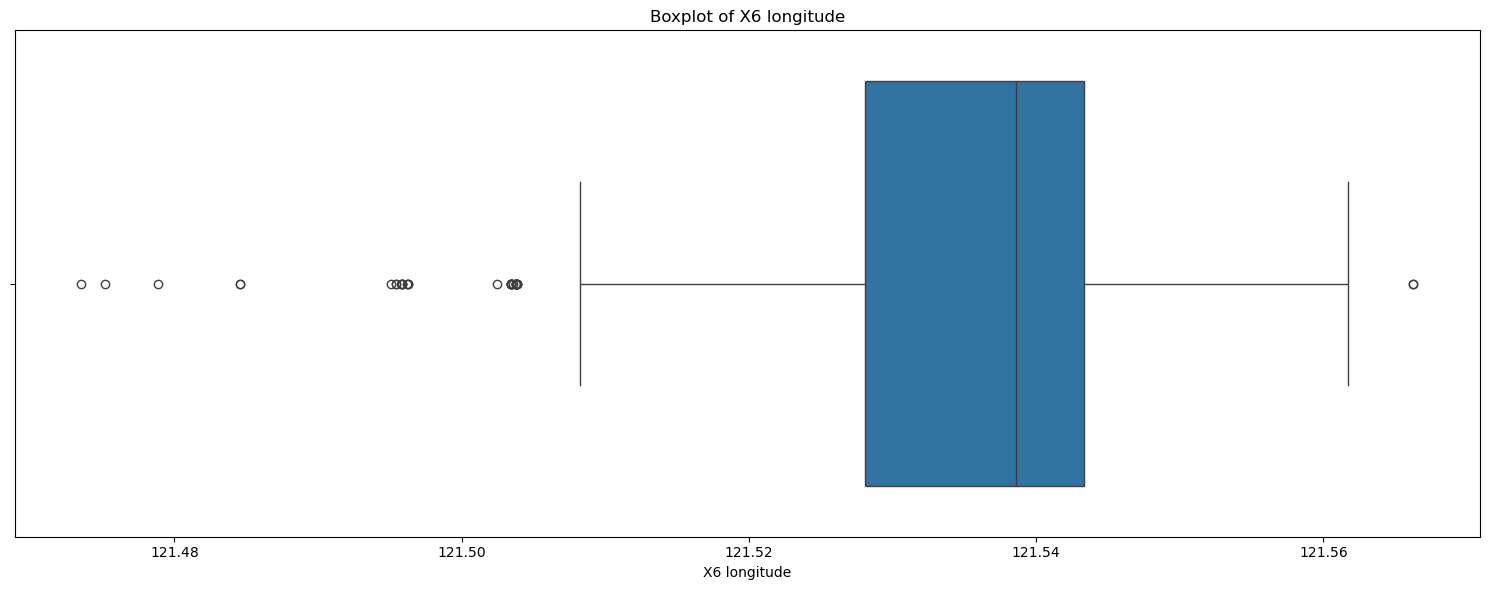

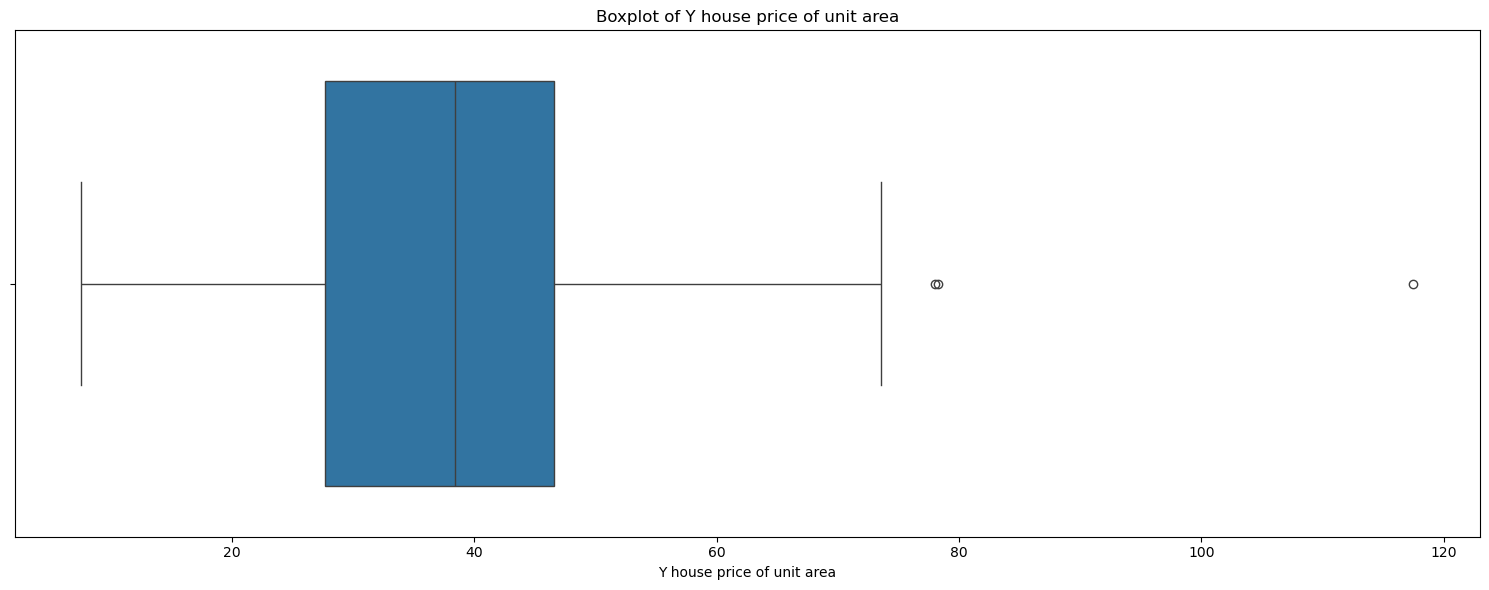

In [17]:
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=rs_data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

<Figure size 1500x600 with 0 Axes>

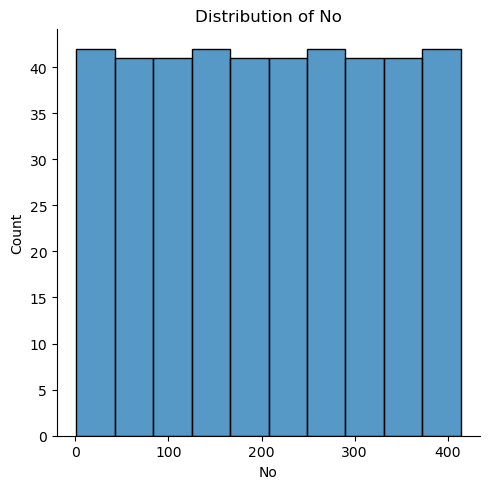

<Figure size 1500x600 with 0 Axes>

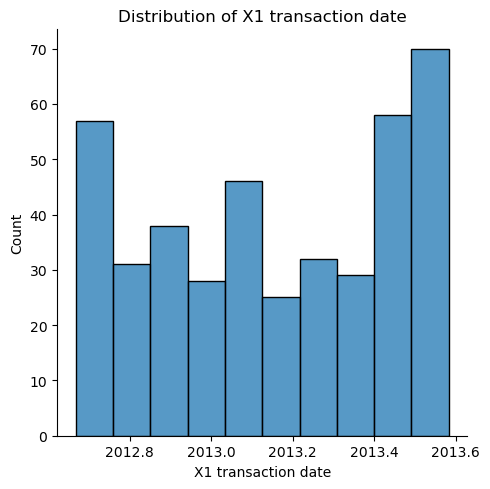

<Figure size 1500x600 with 0 Axes>

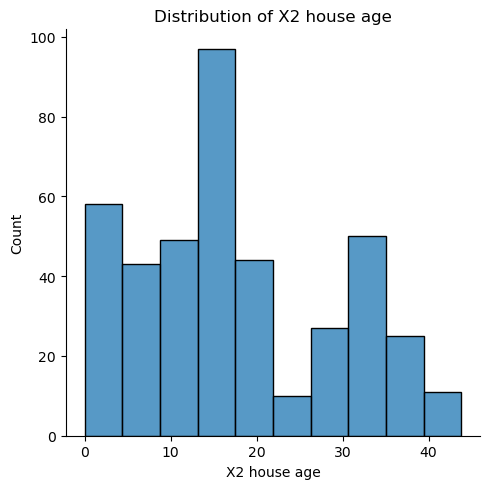

<Figure size 1500x600 with 0 Axes>

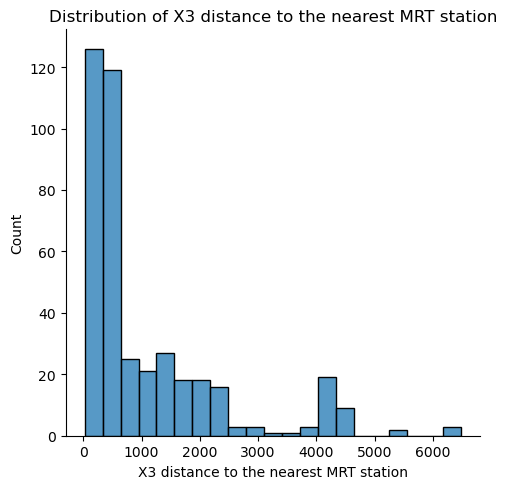

<Figure size 1500x600 with 0 Axes>

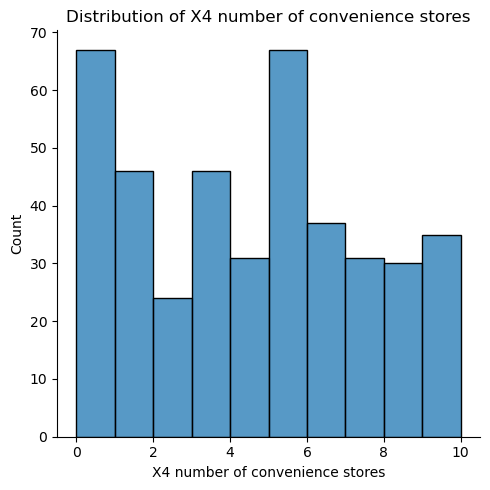

<Figure size 1500x600 with 0 Axes>

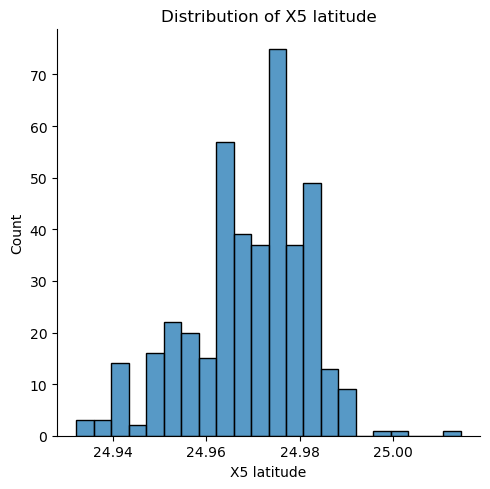

<Figure size 1500x600 with 0 Axes>

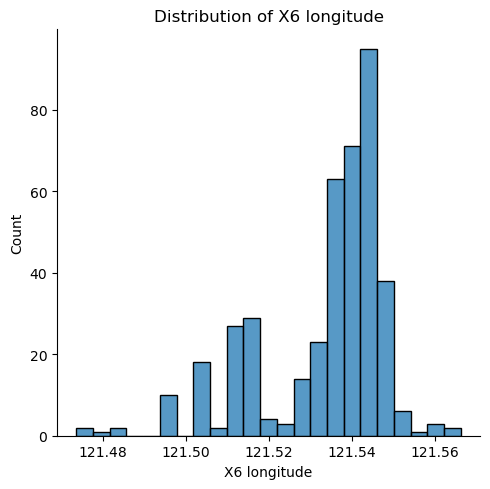

<Figure size 1500x600 with 0 Axes>

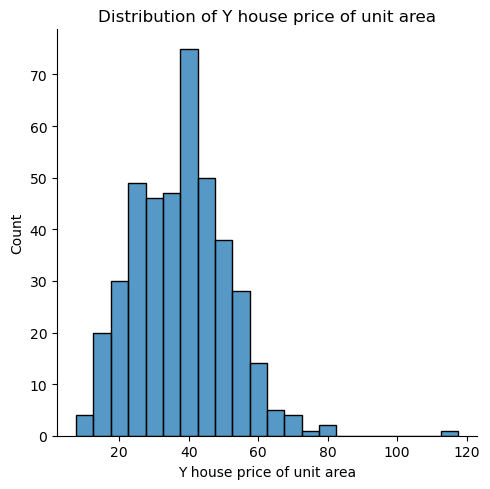

In [18]:
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, 6))
    sns.displot(x=rs_data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

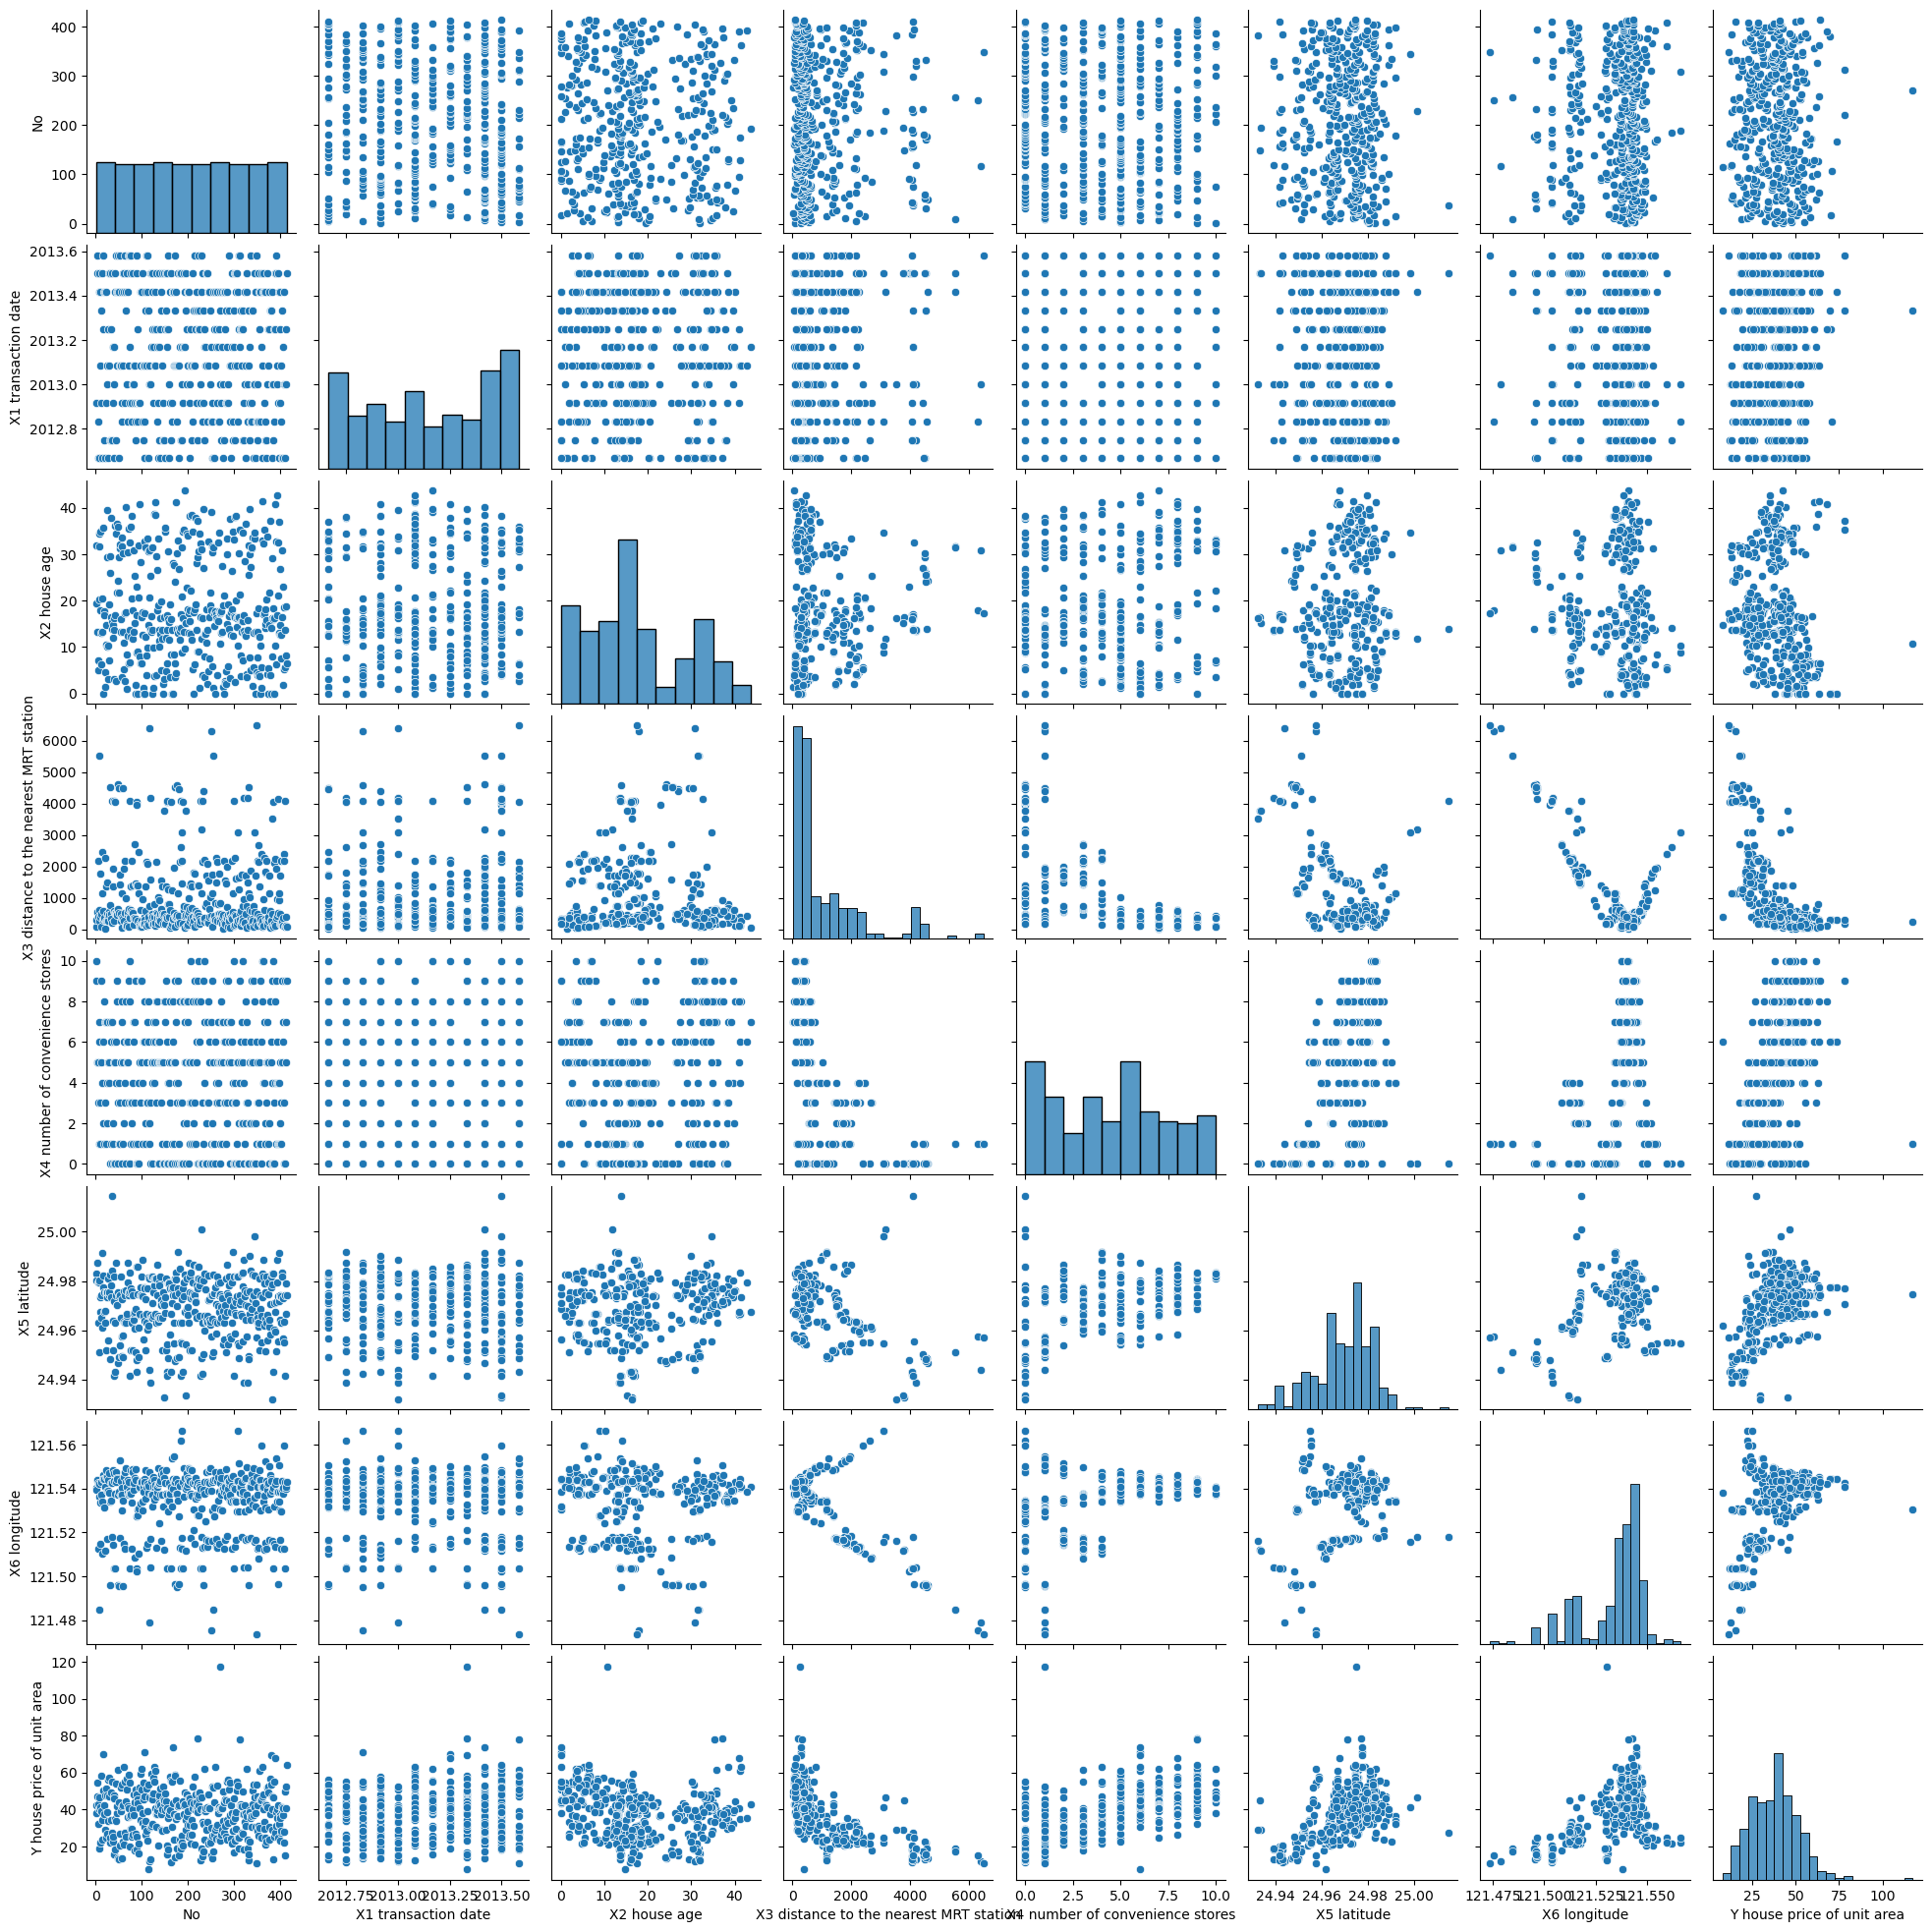

In [19]:
#pairplot
sns.pairplot(rs_data[numeric_cols])
plt.show()

In [20]:
rs_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [21]:
x_cols = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
y_col = 'Y house price of unit area'

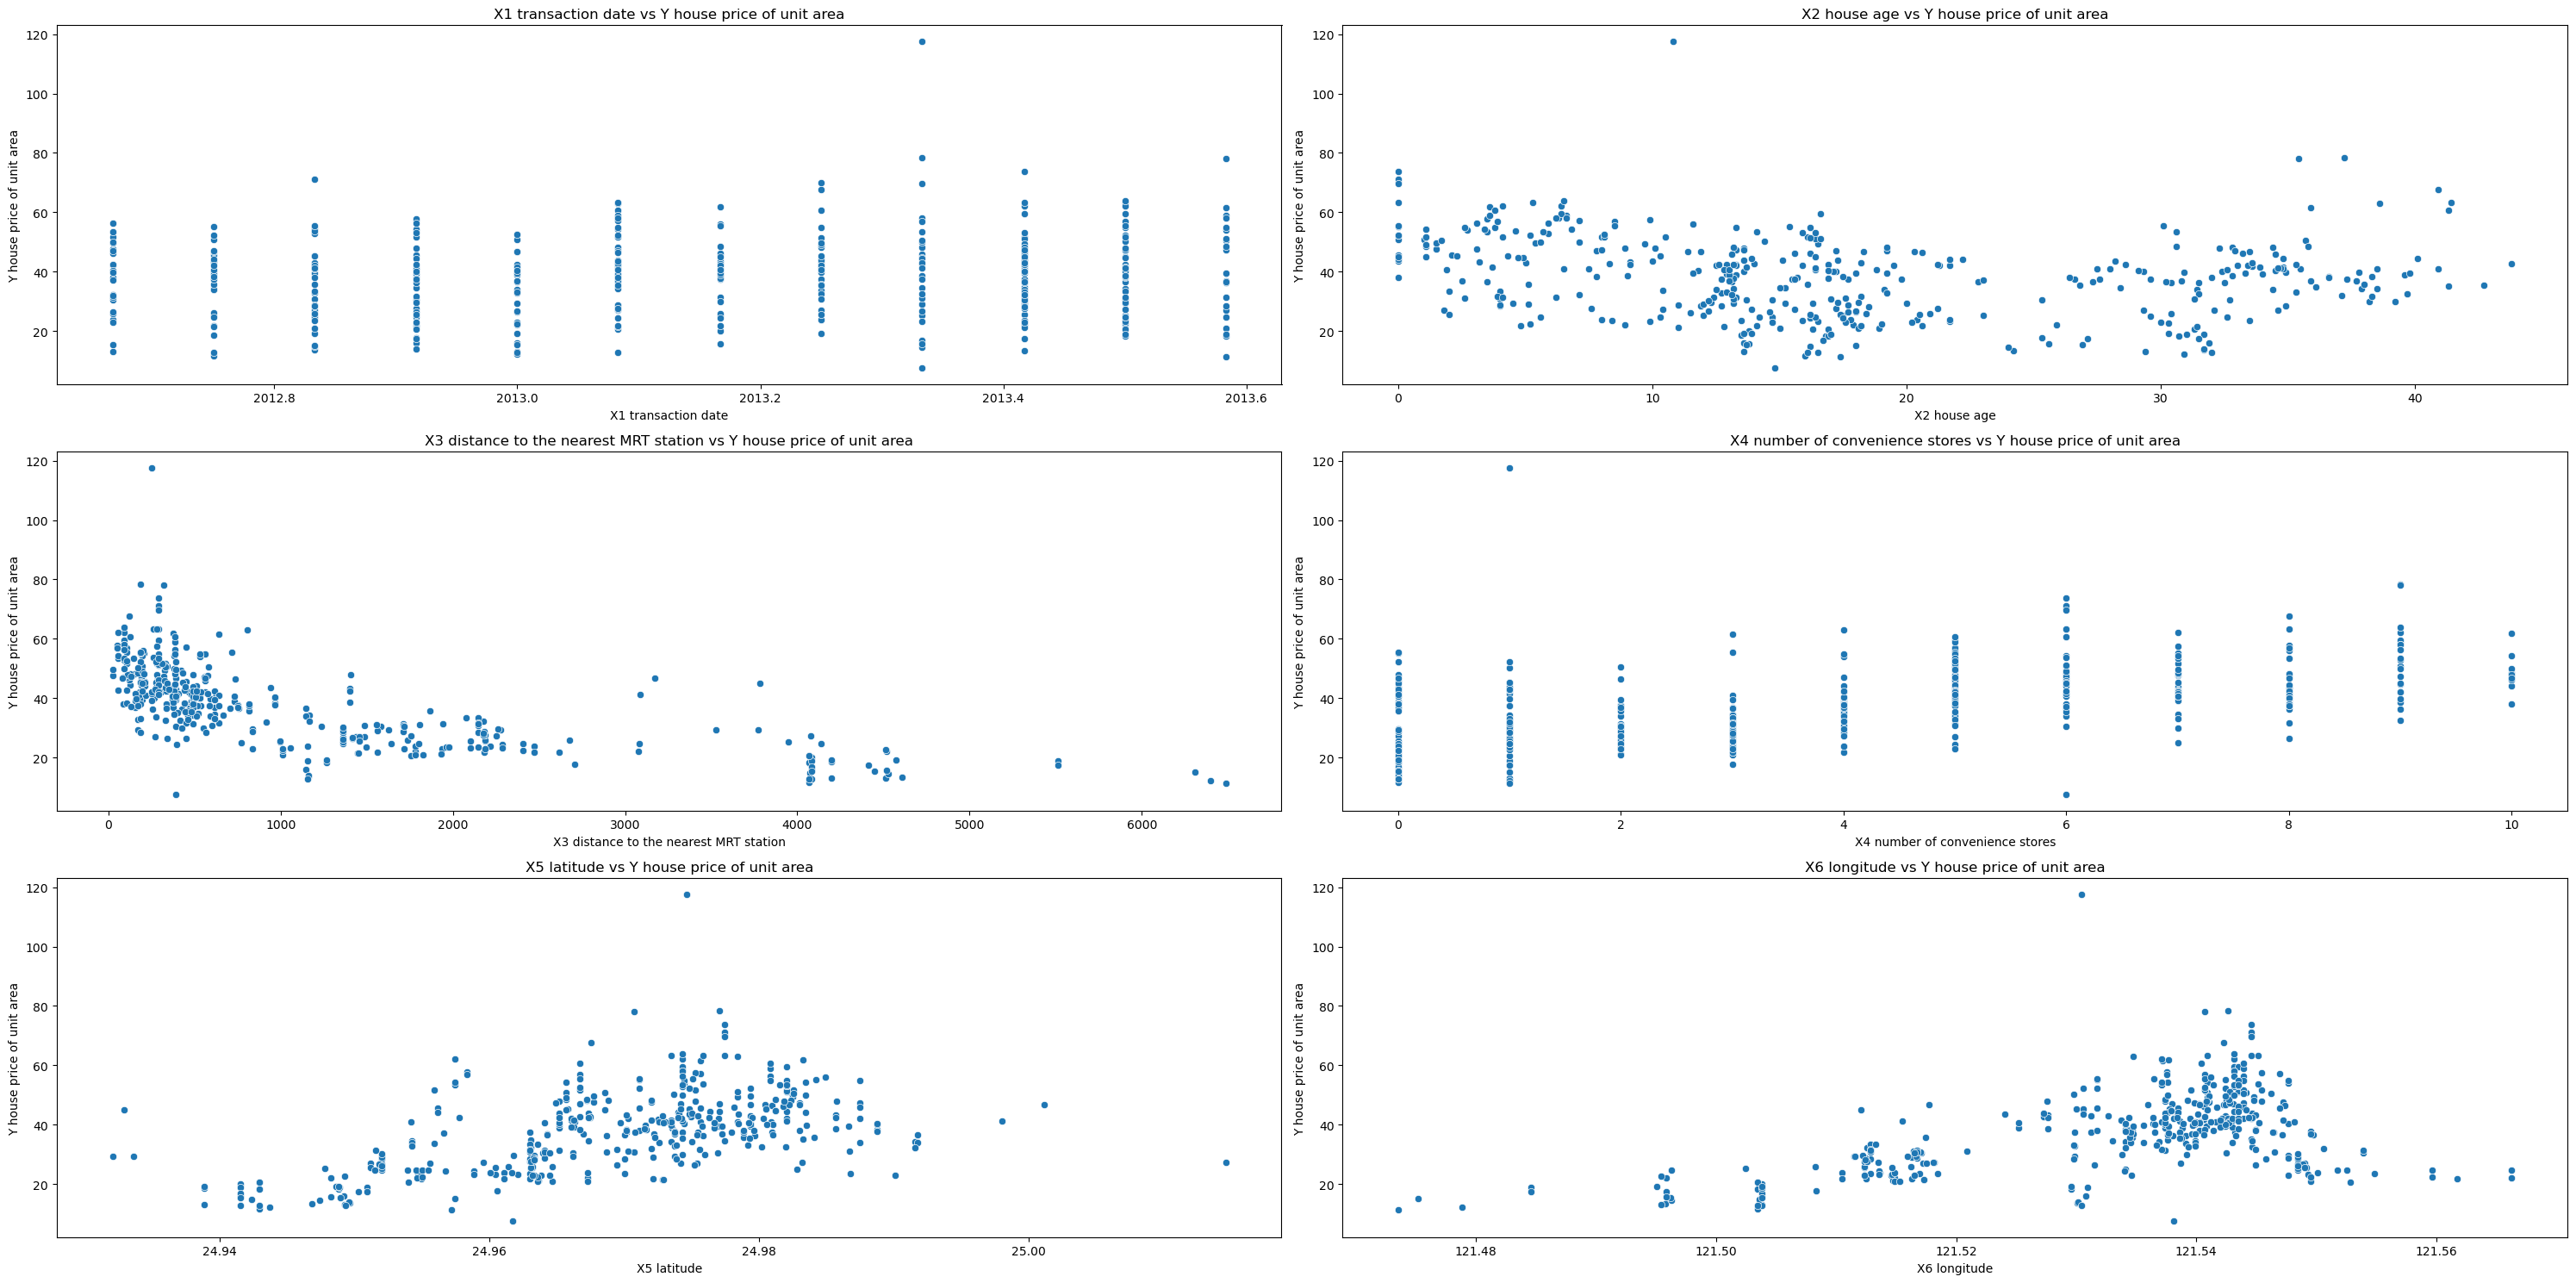

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(30, 15))
for i, col in enumerate(x_cols):
    sns.scatterplot(x=rs_data[col], y=rs_data[y_col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"{col} vs {y_col}")
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel(y_col)

plt.tight_layout()
plt.show()

In [23]:
rs_data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [24]:
rs_data.corr(numeric_only=True)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


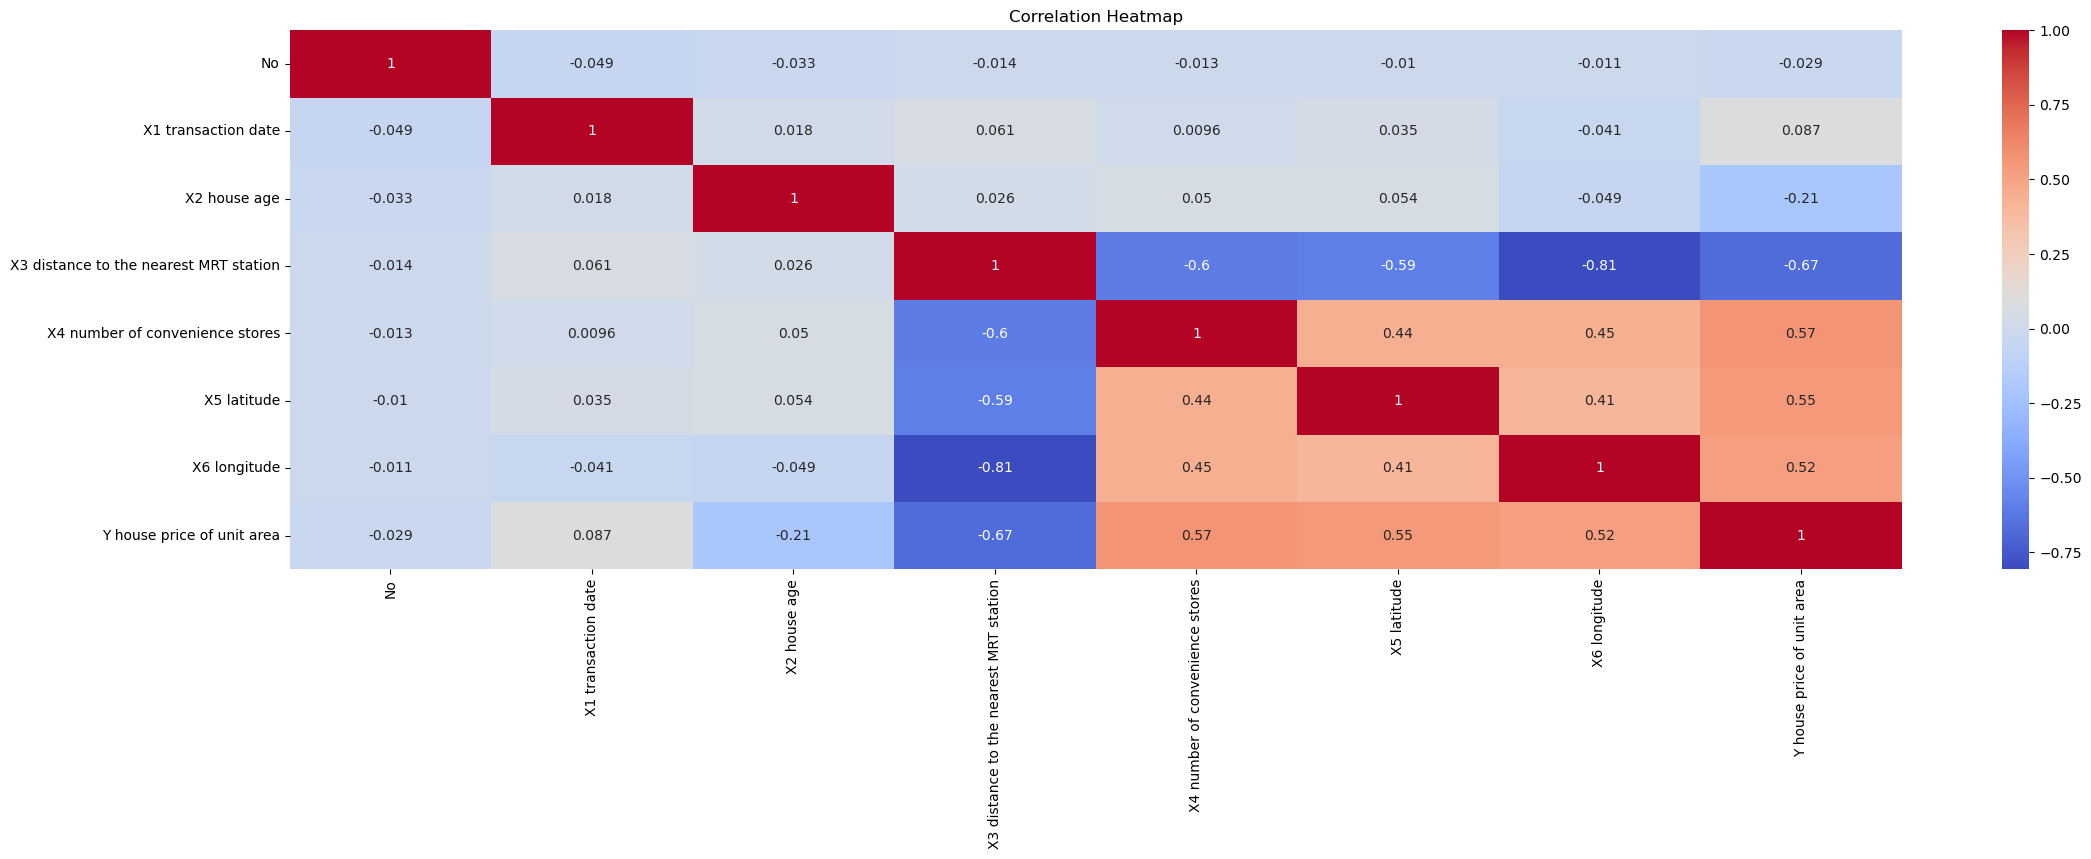

In [25]:
sns.heatmap(rs_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Statiscal analysis and prediction

In [26]:
rs_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [27]:
rs_data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


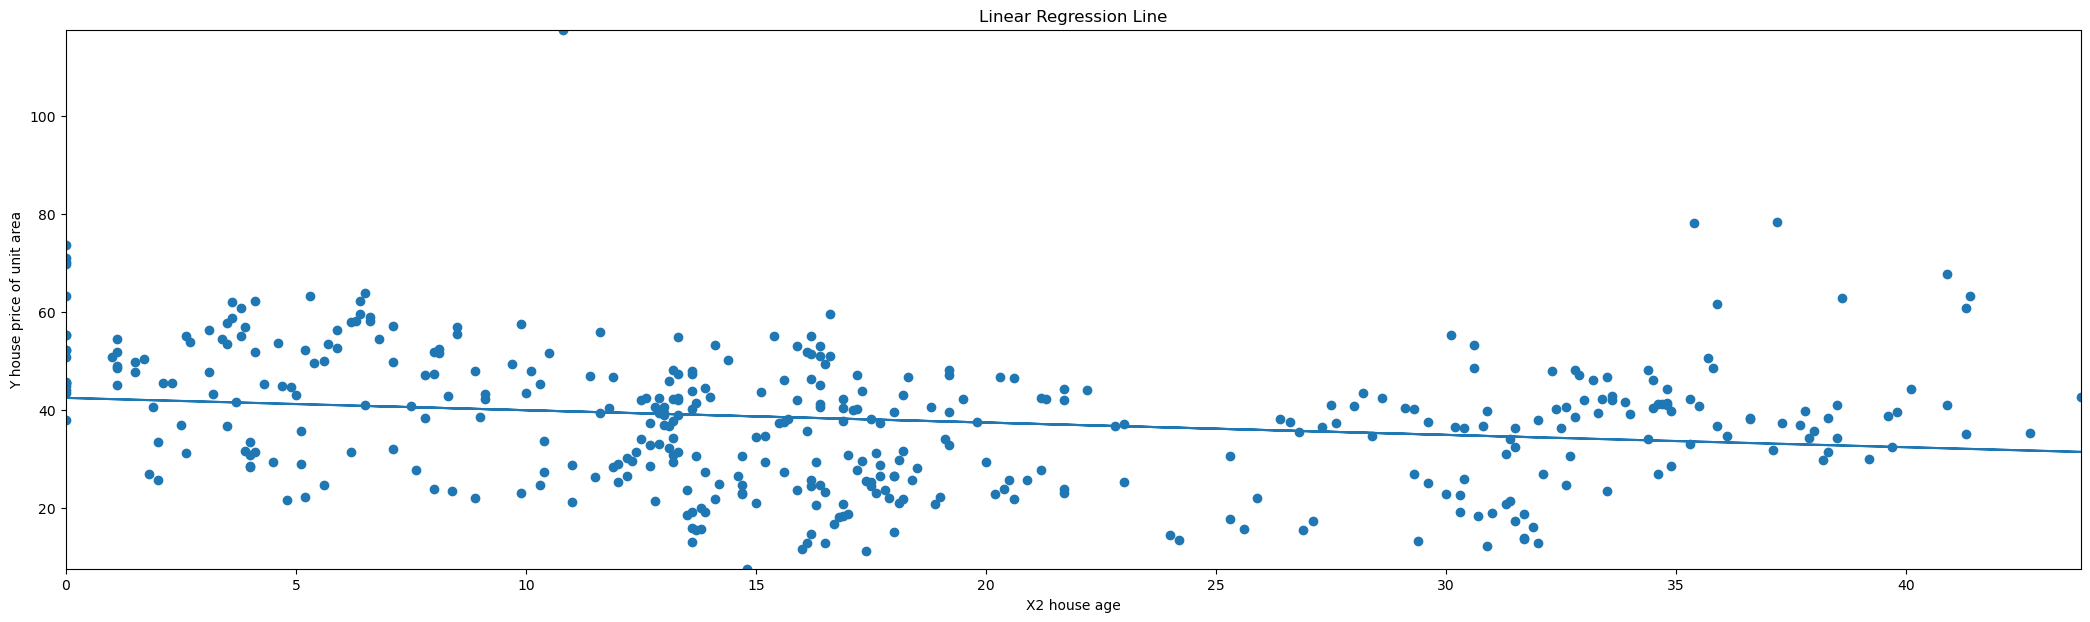

In [28]:
x = rs_data['X2 house age']
y = rs_data['Y house price of unit area']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict(x):
    return slope * x + intercept

mymodel = list(map(predict, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=7.6, ymax=117.5)
plt.xlim(xmin=0, xmax=43.8)
plt.ylabel('Y house price of unit area')
plt.xlabel('X2 house age')
plt.title('Linear Regression Line')
plt.show()

In [29]:
rs_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [30]:
rs_data = rs_data.rename(columns={'Y house price of unit area': 'Y_house_price', 'X2 house age': 'X2_house_age', 'X1 transaction date': 'X1_transaction_date', 'X3 distance to the nearest MRT station': 'X3_distance_to_nearest_MRT_station', 'X4 number of convenience stores': 'X4_number_of_convenience_stores', 'X5 latitude': 'X5_latitude', 'X6 longitude': 'X6_longitude'})

In [31]:
rs_data.columns

Index(['No', 'X1_transaction_date', 'X2_house_age',
       'X3_distance_to_nearest_MRT_station', 'X4_number_of_convenience_stores',
       'X5_latitude', 'X6_longitude', 'Y_house_price'],
      dtype='object')

In [32]:
model = smf.ols('Y_house_price ~ X2_house_age ', data=rs_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Y_house_price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.11
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           1.56e-05
Time:                        03:17:55   Log-Likelihood:                -1658.3
No. Observations:                 414   AIC:                             3321.
Df Residuals:                     412   BIC:                             3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.4347      1.211     35.042   

In [65]:
rs_data.describe()

,No,X1_transaction_date,X2_house_age,X3_distance_to_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [66]:
def predict_price(X2_house_age):
    return (-0.2515 * X2_house_age + 42.4347)

print(predict_price(43.8))
print(predict_price(9.0))



31.419
40.1712


In [33]:
rs_data.columns

Index(['No', 'X1_transaction_date', 'X2_house_age',
       'X3_distance_to_nearest_MRT_station', 'X4_number_of_convenience_stores',
       'X5_latitude', 'X6_longitude', 'Y_house_price'],
      dtype='object')

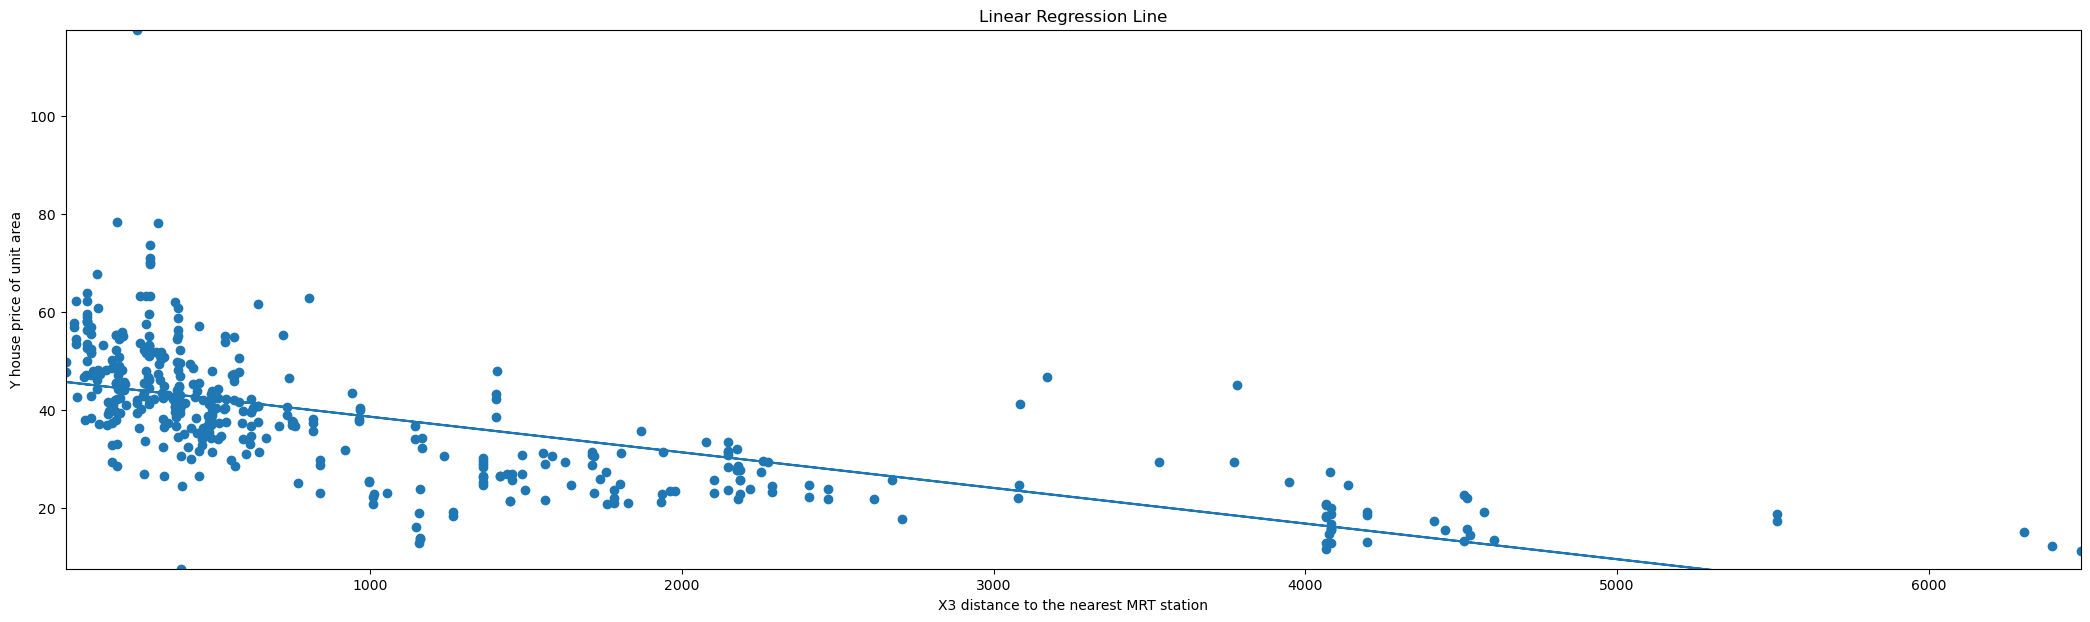

In [37]:
x = rs_data['X3_distance_to_nearest_MRT_station']
y = rs_data['Y_house_price']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict(x):
    return slope * x + intercept

mymodel = list(map(predict, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=7.6, ymax=117.5)
plt.xlim(xmin=23.382840, xmax=6488.021)
plt.ylabel('Y house price of unit area')
plt.xlabel('X3 distance to the nearest MRT station')
plt.title('Linear Regression Line')
plt.show()

In [38]:
model = smf.ols('Y_house_price ~ X3_distance_to_nearest_MRT_station', data=rs_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Y_house_price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           4.64e-56
Time:                        03:33:14   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
def predict_price(X3_distance_to_nearest_MRT_station):
    return(-0.0073 * X3_distance_to_nearest_MRT_station + 45.8514)
print(predict_price(23.382840))
print(predict_price(289.324800))
print(predict_price(492.231300))
print(predict_price(1454.279000))
print(predict_price(6488.021))

45.680705268
43.739328959999995
42.25811151
35.235163299999996
-1.5111533000000037


In [42]:
rs_data.columns

Index(['No', 'X1_transaction_date', 'X2_house_age',
       'X3_distance_to_nearest_MRT_station', 'X4_number_of_convenience_stores',
       'X5_latitude', 'X6_longitude', 'Y_house_price'],
      dtype='object')

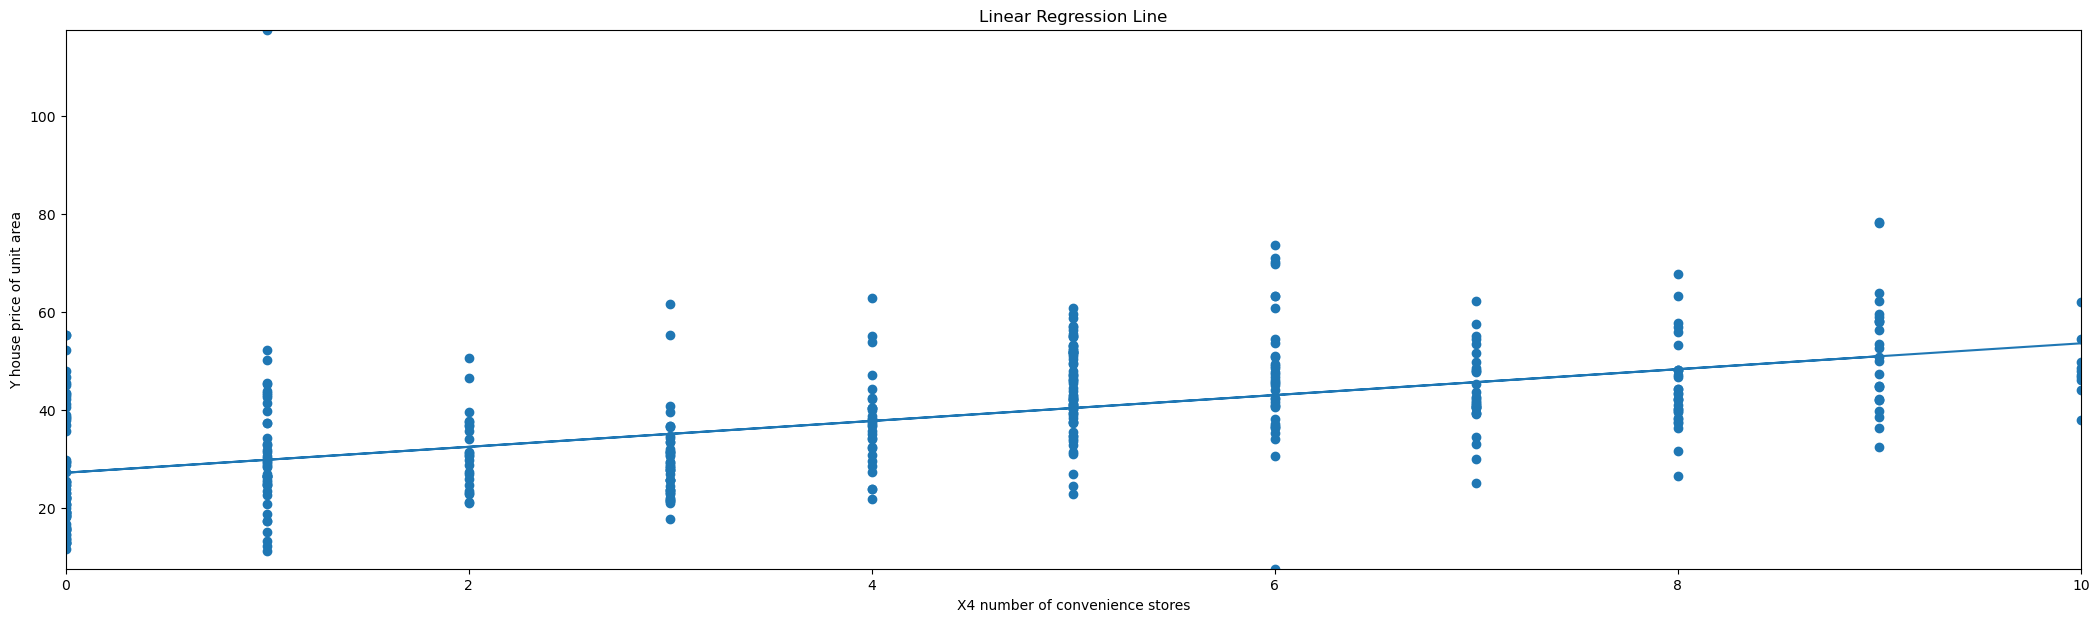

In [43]:
x = rs_data['X4_number_of_convenience_stores']
y = rs_data['Y_house_price']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict(x):
    return slope * x + intercept

mymodel = list(map(predict, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=7.6, ymax=117.5)
plt.xlim(xmin=0, xmax=10)
plt.ylabel('Y house price of unit area')
plt.xlabel('X4 number of convenience stores')
plt.title('Linear Regression Line')
plt.show()

In [45]:
model = smf.ols('Y_house_price ~ X4_number_of_convenience_stores', data=rs_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Y_house_price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           3.41e-37
Time:                        03:49:11   Log-Likelihood:                -1586.0
No. Observations:                 414   AIC:                             3176.
Df Residuals:                     412   BIC:                             3184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [46]:
def predict_price(X4_number_of_convenience_stores):
    return(2.6377 * X4_number_of_convenience_stores + 27.1811)
print(predict_price(0))
print(predict_price(1))
print(predict_price(4))
print(predict_price(6))
print(predict_price(10))

27.1811
29.8188
37.7319
43.0073
53.5581


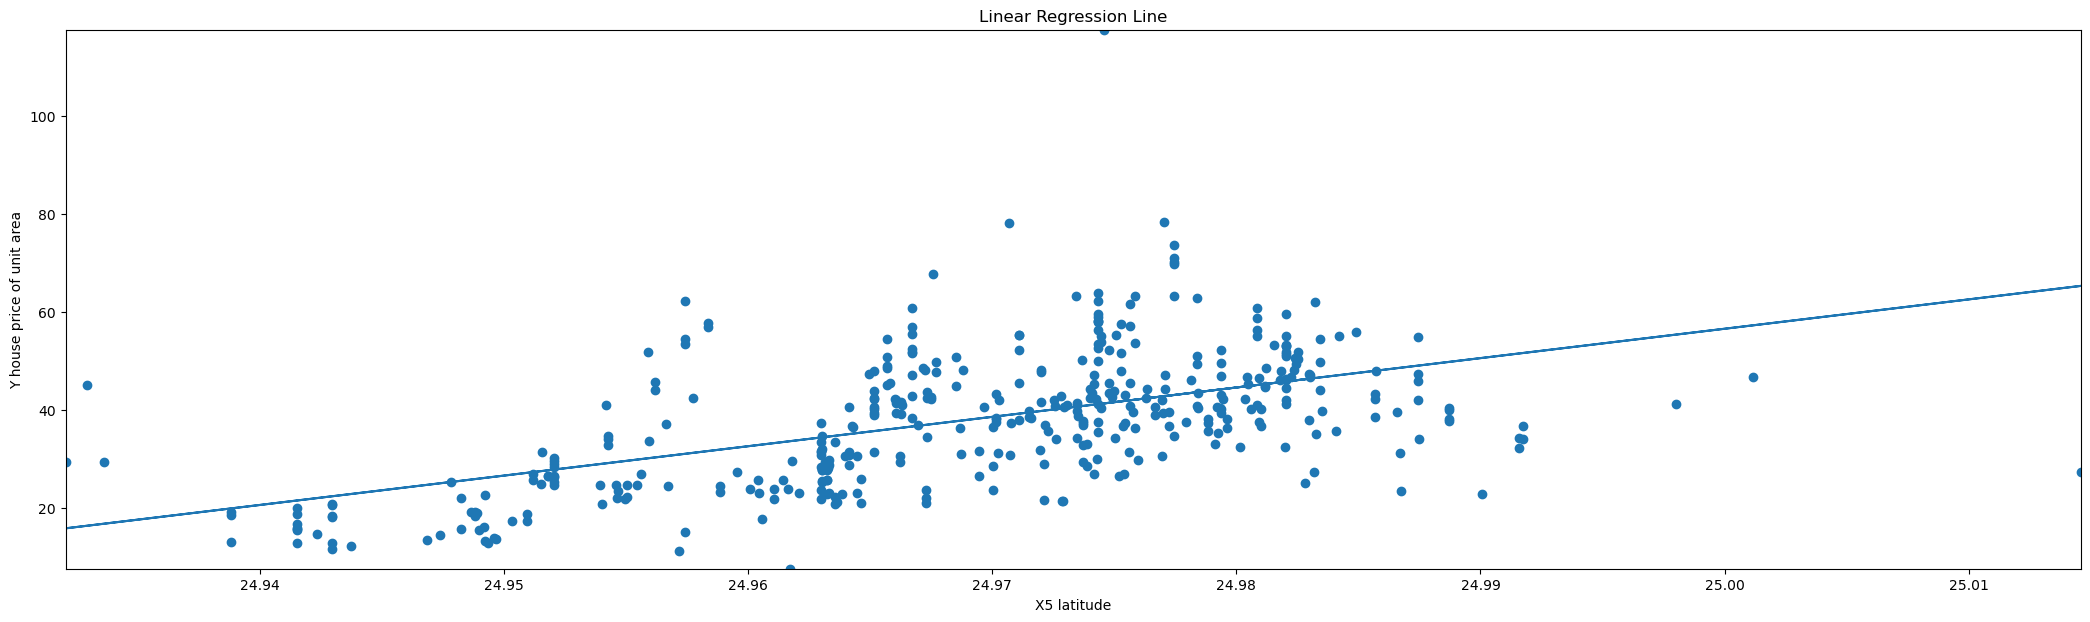

In [47]:
x = rs_data['X5_latitude']
y = rs_data['Y_house_price']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict(x):
    return slope * x + intercept

mymodel = list(map(predict, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=7.6, ymax=117.5)
plt.xlim(xmin=24.932070, xmax=25.014590)
plt.ylabel('Y house price of unit area')
plt.xlabel('X5 latitude')
plt.title('Linear Regression Line')
plt.show()

In [48]:
model = smf.ols('Y_house_price ~ X5_latitude', data=rs_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Y_house_price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           1.39e-33
Time:                        04:00:00   Log-Likelihood:                -1594.3
No. Observations:                 414   AIC:                             3193.
Df Residuals:                     412   BIC:                             3201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.492e+04   1129.665    -13.205      

In [49]:
print( -1.492e+04)

-14920.0


In [50]:
def predict_price(X5_latitude):
    return( -1.4920 * X5_latitude + 598.9683)
print(predict_price(24.932070))
print(predict_price(24.963))
print(predict_price(24.977455))
print(predict_price(25.014590))

561.76965156
561.723504
561.70193714
561.64653172


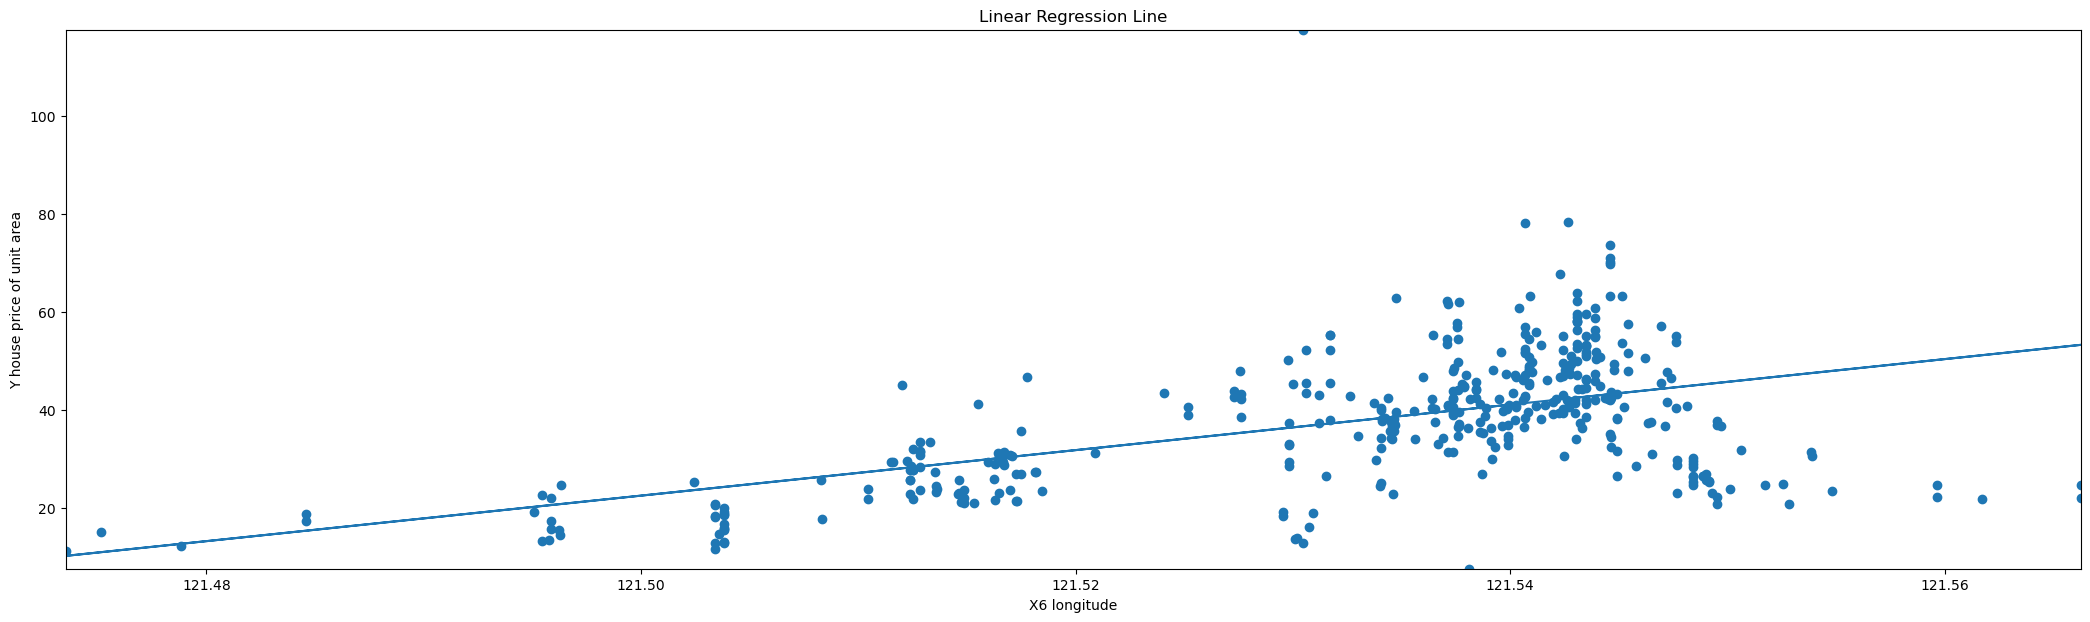

In [51]:
x = rs_data['X6_longitude']
y = rs_data['Y_house_price']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict(x):
    return slope * x + intercept

mymodel = list(map(predict, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=7.6, ymax=117.5)
plt.xlim(xmin=121.473530, xmax=121.566270)
plt.ylabel('Y house price of unit area')
plt.xlabel('X6 longitude')
plt.title('Linear Regression Line')
plt.show()

In [52]:
model = smf.ols('Y_house_price ~ X6_longitude', data=rs_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Y_house_price   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           1.77e-30
Time:                        04:16:53   Log-Likelihood:                -1601.5
No. Observations:                 414   AIC:                             3207.
Df Residuals:                     412   BIC:                             3215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.635e+04   4523.596    -12.456   

In [53]:
print(-5.635e+04)

-56350.0


In [55]:
def predict_price(X6_longitude):
    return( 463.9347 * X6_longitude -56350.0)
print(predict_price(121.473530))
print(predict_price(121.528035))
print(predict_price(121.538630))
print(predict_price(121.543305))
print(predict_price(121.566270))

5.7856984910031315
31.072459314505977
35.987847461001365
38.15674218350614
48.811002569003904


Machine learning

In [27]:
# Prepare the feature matrix (X) and target vector (y)
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target = 'Y house price of unit area'

In [28]:
# Prepare the feature matrix (X) and target vector (y)
X = rs_data[features]
y = rs_data[target]

create real estate data model

In [29]:
rs_model = LinearRegression()
rs_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
print('The predictions of the model are:')
y_pred = rs_model.predict(X.head())
print(y_pred)

The predictions of the model are:
[47.1689389  47.82573429 48.79677789 48.36964101 46.13886467]


In [31]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [32]:
X.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Add constant term for statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

#fit the OLS model
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

print(ols_model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.558
Model:                                    OLS   Adj. R-squared:                  0.550
Method:                         Least Squares   F-statistic:                     68.21
Date:                        Sat, 21 Feb 2026   Prob (F-statistic):           1.46e-54
Time:                                23:07:57   Log-Likelihood:                -1201.2
No. Observations:                         331   AIC:                             2416.
Df Residuals:                             324   BIC:                             2443.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [34]:
#predicting with the OLS model
y_pred_ols = ols_model.predict(X_test_scaled_const)


print("R-squared:", r2_score(y_test, y_pred_ols))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ols))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ols))

R-squared: 0.6810580555095946
Mean Squared Error: 53.505619124502054
Mean Absolute Error: 5.30535569007404


In [35]:
3#define the model.Specify the number of random state for reproducibility
rsd_model = DecisionTreeRegressor(random_state=42)

#fit model
rsd_model.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [36]:
print('The predictions of the model are:')
print(X.head())
y_pred_d = rsd_model.predict(X.head())
print(y_pred_d)

The predictions of the model are:
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                               10     24.98298     121.54024  
1                                9     24.98034     121.53951  
2                                5     24.98746     121.54391  
3                                5     24.98746     121.54391  
4                                5     24.97937     121.54245  
[37.9 42.2 47.3 54.8 43.1]


In [37]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_pred =dtree.predict(X_test.head())
print("Predictions:", y_pred)

(331, 6)
(83, 6)
(331,)
(83,)
Predictions: [48.6 38.9 43.5 32.9 23.8]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtee = DecisionTreeRegressor(random_state=42)
dtee.fit(X_train, y_train)

y_pred_d = dtee.predict(X_test.head())

print("Train data accuracy:", dtee.score(X_train, y_train))
print("Test data accuracy:", dtee.score(X_test, y_test))

Train data accuracy: 0.9976097030996492
Test data accuracy: 0.6037699868152279


Model validation

In [40]:
#model validation
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the model
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(train_X, train_y)

#Evaluate the model on the validation set
val_predictions = dtree.predict(val_X)
print("Validation Predictions:", val_predictions)
print("Validation R-squared:", r2_score(val_y, val_predictions))
print("Validation Mean Squared Error:", mean_squared_error(val_y, val_predictions))

Validation Predictions: [48.6 38.9 43.5 32.9 23.8 38.6 51.7 55.  12.8 58.1 25.9 33.4 48.  13.8
 34.2 23.  32.4 57.8 27.7 34.4 14.4 20.9 57.1 36.3 11.6 33.1 12.8 43.5
 67.7 28.5 22.6 21.7 36.8 26.6 41.2 41.4 52.7 15.9 38.6 60.7 61.5 37.5
 46.1 37.4 39.3 47.9 31.6 32.1 47.7 53.3 48.6 55.  34.1 40.8 55.3 15.9
 34.1 22.8 27.7 55.  23.1 25.9 15.9 13.2 18.8 20.9 26.6 31.6 35.7 25.3
 39.3 61.5 57.8 36.9 28.5 43.1 39.  26.9 37.4 31.1 46.4 42.1 28.4]
Validation R-squared: 0.6037699868152279
Validation Mean Squared Error: 66.47144578313254
